Удалила "2 Зрелый почерк-(обычный почерк)-2.jpg" (там печатный текст)

# Config

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/mest

/content/drive/MyDrive/Colab Notebooks/mest


In [ ]:
!pip install -q hydra-core==1.3
# https://colab.research.google.com/gist/fabiocarrara/6bf5abaecf3f84c1e83239f8af3b8219/hydra_instantiate_bug.ipynb

# Библиотеки

In [ ]:
import json, os
import matplotlib.pyplot as plt

from torchvision import datasets, models, transforms
from time import time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from torchvision.transforms import v2
from PIL import Image, ImageOps
from tqdm import tqdm

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import os, json, cv2, re
import numpy as np
import random
import pickle

# from src.dataset import My_Dataset, TripletDataset, Emb_Dataset
# from src.functions import number_of_parameters, seed_everything # create_model
# from src.dataset_fun import split_dataset
# from src import siamese, classifier
# from src.classifier import get_predictions
# from src.train import train, load_logs, load_model, save_logs, load_logs
# from src.functions import confusion_matrix, distribution
# from src.show_fun import show_result, show_images, plot_transformed_images

# from src.commands import hydra_config, show_CONF, config_model
# from src.commands import common_train, load_best_model, pos_neg_dataset

In [ ]:
# transform = transforms.Compose(
#         [
#             transforms.RandomCrop(300),
#             transforms.CenterCrop(224),
#             transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
#             transforms.ToTensor(),
#             # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
#         ]
#     )


# files = os.listdir("bin/1")
# files = [os.path.join("bin/1", i) for i in files]
# plot_transformed_images(files, transform, n=10)

def show_voting(model,
    dataset,
    aug,
    batch_size,
    device):

    X, y_true, y_pred, y_prob = get_predictions(model, dataset, batch_size, device)

    height = len(dataset) // aug
    # width = aug
    # print(height, aug)

    for i in range(height):

        X_cur = X[i::height]
        y_prob_cur = y_prob[i::height]

        width = len(X_cur)
        plt.figure(figsize=(6.4 * width, 6))

        for j in range(width):
            plt.subplot(1, width, j % width + 1)
            img = X_cur[j]
            img = np.transpose(img, (1, 2, 0))

            title = f"№ {i}:   {y_prob_cur[j]}"
            plt.title(title)
            plt.imshow(img)

        plt.tight_layout()
        plt.show()


# pos_dataset, neg_dataset = pos_neg_dataset(CONF, transform, pos_aug=5, neg_aug=5)

# show_voting(model, pos_dataset, 5, CONF.loader.batch_size, CONF.device)
# show_voting(model, neg_dataset, 5, CONF.loader.batch_size, CONF.device)


def graph2(x, y1, y2, title="", ylog=True, ylabel=""):

    plt.title(title, fontsize=13)

    plt.plot(x, y1, color='g', label = "Train")
    plt.plot(x, y2, color='m', label = "Val")

    plt.grid(True)
    plt.ylabel(ylabel,  fontsize=10)
    plt.xlabel("Номер эпохи",  fontsize=10)

    if ylog:
        plt.yscale('log')

    plt.legend(fontsize=10)

def graph_logs(logs, num=None, ylog=True):
    plt.figure(figsize=(15, 6))

    if not num:
        num = len(logs["epoch"])

    x = logs["epoch"][:num]
    y1 = logs["train_loss"][:num]
    y2 = logs["val_loss"][:num]

    plt.subplot(1, 2, 1)
    graph2(x, y1, y2, title="", ylog=ylog, ylabel="loss")

    x = logs["epoch"][:num]
    y1 = logs["train_accuracy"][:num]
    y2 = logs["val_accuracy"][:num]

    plt.subplot(1, 2, 2)
    graph2(x, y1, y2, title="", ylog=ylog, ylabel="accuracy")

    plt.show()

class Pipeline(nn.Module):
    def __init__(self, model, cl):
        super().__init__()
        self.model = model
        self.cl = cl

    def forward(self, x):
        x = self.model(x.to(CONF1.device))
        x = self.cl(x)
        return x

def create_model(model, num_non_freeze, num_out_classes, verbose=False):
    # замена последнего слоя сети
    model.fc = nn.Linear(512, num_out_classes)

    num_param = number_of_parameters(model)
    num_freeze = num_param - num_non_freeze

    # заморозка слоев
    cur_freeze = 0
    for i, layer in enumerate(model.children()):
        for param in layer.parameters():
            if param.requires_grad:
                if cur_freeze >= num_freeze:
                    return model

                param.requires_grad = False
                cur_freeze += param.numel()
                if verbose:
                    print(num_param - cur_freeze)

# model = Pipeline(siam, cl)

# graph2(logs['epoch'], logs['train_loss'], logs['val_loss'], title="")

# RGB + classifier

In [ ]:
# import hydra
# from hydra import compose, initialize
# from omegaconf import OmegaConf

# hydra.core.global_hydra.GlobalHydra.instance().clear()

# initialize(config_path="configs", version_base="1.3")
# config = compose(config_name="config4.yaml")

# if not os.path.exists(config.save_path):
#     os.makedirs(config.save_path)

# config.device = "cuda" if torch.cuda.is_available() else "cpu"

# if "classifier" in config:
#     path_model = os.path.join(
#         config.save_path, config.classifier.path_model
#     )

#     config.classifier.path_model = path_model

#     if not os.path.exists(path_model):
#         os.makedirs(path_model)

#     config.classifier.path_log = os.path.join(path_model, config.classifier.path_log)

# if "siamese" in config:
#     path_model = os.path.join(
#         config.save_path, config.siamese.path_model
#     )

#     config.siamese.path_model = path_model

#     if not os.path.exists(path_model):
#         os.makedirs(path_model)

#     config.siamese.path_log = os.path.join(path_model, config.siamese.path_log)

In [ ]:
CONF1 = hydra_config("config (RGB).yaml")
show_CONF(CONF1)

{
        "seed": 42,
        "device": "cuda",
        "save_path": "checkpoints",
        "dataset": {
                "data_pos": "data/1",
                "data_neg": "data/0",
                "threshold": false
        },
        "loader": {
                "batch_size": 64
        },
        "classifier": {
                "n_epochs": 30,
                "learning_rate": 0.0003,
                "path_model": "checkpoints/RGB",
                "path_log": "checkpoints/RGB/RGB.pickle"
        }
}


In [ ]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(CONF1.device)
num_classes = 2
num_non_freeze = 2050 # 2361346
seed_everything(CONF1.seed)
model = create_model(model, num_non_freeze, num_classes).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(model)}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


num parameters ResNet = 2050


Positive dataset: 880    (22)
Negative dataset: 896    (224)
split_dataset: Train: 1420 Test: 356 Total: 1776
train: started, kind = 'cl'
# 2024-06-06 07:25:36 Epoch  1 train/val: loss 0.70981/0.73007, acc: 52.254%/ 50.000%
# 2024-06-06 07:25:45 Epoch  2 train/val: loss 0.48655/0.48750, acc: 82.394%/ 83.427%
# 2024-06-06 07:25:52 Epoch  3 train/val: loss 0.35332/0.35392, acc: 93.592%/ 93.820%
# 2024-06-06 07:26:00 Epoch  4 train/val: loss 0.28868/0.29147, acc: 95.986%/ 95.506%
# 2024-06-06 07:26:07 Epoch  5 train/val: loss 0.24757/0.25225, acc: 96.479%/ 96.067%
# 2024-06-06 07:26:16 Epoch  6 train/val: loss 0.21625/0.21840, acc: 97.465%/ 97.472%
# 2024-06-06 07:26:22 Epoch  7 train/val: loss 0.19068/0.18993, acc: 97.817%/ 98.315%
# 2024-06-06 07:26:31 Epoch  8 train/val: loss 0.17079/0.17447, acc: 98.310%/ 98.596%
# 2024-06-06 07:26:39 Epoch  9 train/val: loss 0.15555/0.15896, acc: 98.451%/ 98.596%
# 2024-06-06 07:26:46 Epoch 10 train/val: loss 0.13742/0.14002, acc: 98.732%/ 99.157%
# 

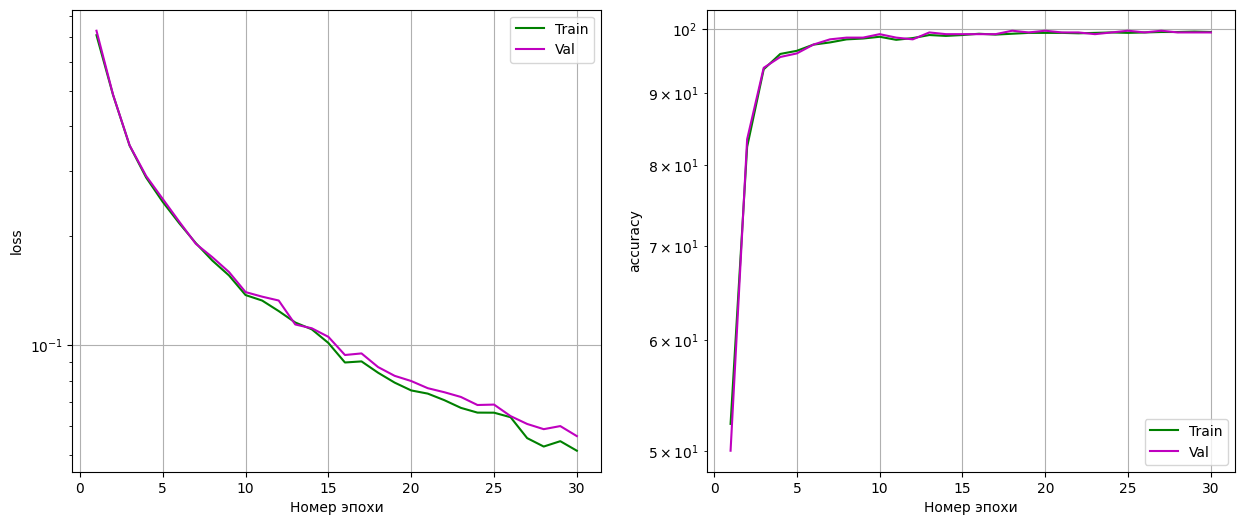

In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=40, neg_aug=4)

dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset)
common_train(CONF1, model, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, model, train_dataset, test_dataset, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

Total:  0.9932432432432432


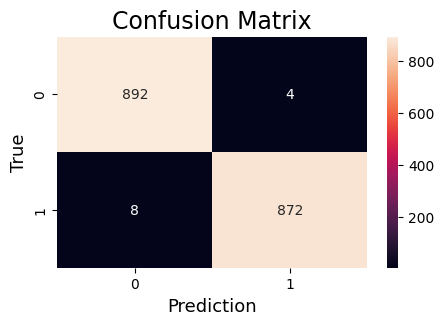

[[892   4]
 [  8 872]]
Positive:  0.990909090909091
Negative:  0.9955357142857143


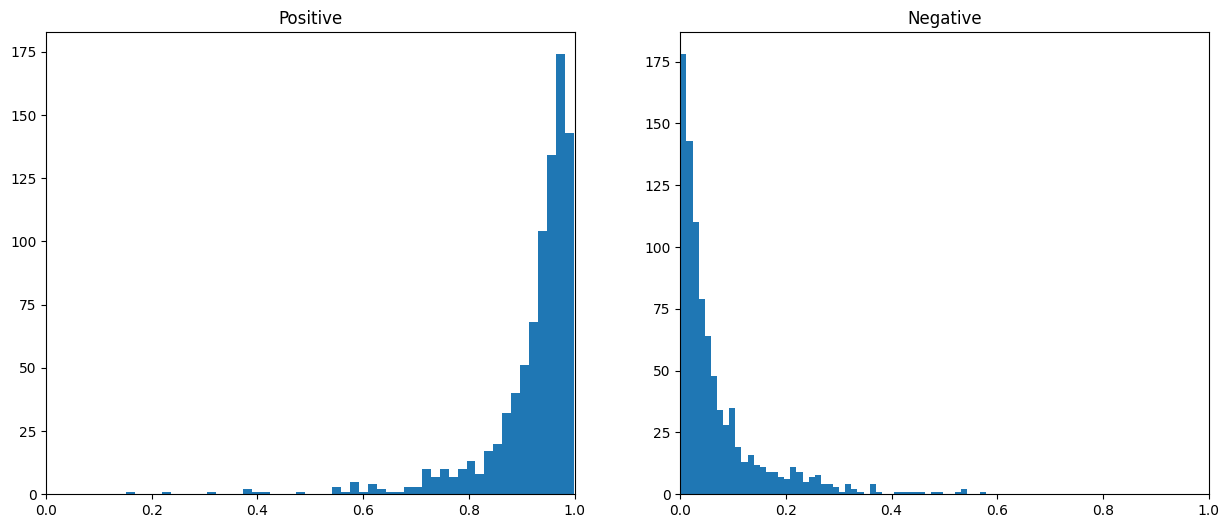

In [ ]:
X, y_true1, y_pred1, y_prob = get_predictions(model, dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Total: ", accuracy_score(y_pred1, y_true1))
print(confusion_matrix(y_true1, y_pred1))

X, y_true2, y_pred2, y_prob2 = get_predictions(model, pos_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Positive: ", accuracy_score(y_pred2, y_true2))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Positive")
distribution(y_prob2)

X, y_true3, y_pred3, y_prob3 = get_predictions(model, neg_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Negative: ", accuracy_score(y_pred3, y_true3))
plt.subplot(1, 2, 2)
plt.title("Negative")
distribution(y_prob3)
plt.show()

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.3,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 24,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.6,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.8,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.1,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 24,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

# bin + classifier

In [ ]:
CONF1 = hydra_config("config (bin).yaml")
show_CONF(CONF1)

{
        "seed": 42,
        "device": "cuda",
        "save_path": "checkpoints",
        "dataset": {
                "data_pos": "bin/1",
                "data_neg": "bin/0",
                "threshold": 0.95
        },
        "loader": {
                "batch_size": 64
        },
        "classifier": {
                "n_epochs": 50,
                "learning_rate": 0.0003,
                "path_model": "checkpoints/bin",
                "path_log": "checkpoints/bin/bin.pickle"
        }
}


In [ ]:
# image = Image.open("bin/1/1 Ранний почерк-(хороший почерк)-1.png")
# transformed_image = transform(image)
# print(transformed_image.shape)
# plt.imshow(transformed_image.permute(1, 2, 0))

# x, col = np.unique(transformed_image.max(dim=0)[0], return_counts=True
#                         )
# ones = col[np.where(x == 1)[0]][0] # белый
# dol = ones / col.sum()  # доля белого
# print(dol)

In [ ]:
transform = transforms.Compose(
    [
            # transforms.Resize(500),
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=40, neg_aug=4)

Positive dataset: 880    (22)
Negative dataset: 888    (222)


In [ ]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(CONF1.device)
num_classes = 2
num_non_freeze = 2050 # 2361346
seed_everything(CONF1.seed)
model = create_model(model, num_non_freeze, num_classes, verbose=False).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(model)}")

num parameters ResNet = 2050


split_dataset: Train: 1414 Test: 354 Total: 1768
train: started, kind = 'cl'
# 2024-06-06 08:10:33 Epoch  1 train/val: loss 0.68968/0.69460, acc: 54.950%/ 55.932%
# 2024-06-06 08:10:38 Epoch  2 train/val: loss 0.59190/0.59935, acc: 66.124%/ 66.949%
# 2024-06-06 08:10:42 Epoch  3 train/val: loss 0.51841/0.53527, acc: 76.096%/ 73.446%
# 2024-06-06 08:10:48 Epoch  4 train/val: loss 0.49610/0.51841, acc: 79.420%/ 74.576%
# 2024-06-06 08:10:53 Epoch  5 train/val: loss 0.46111/0.49440, acc: 80.905%/ 74.859%
# 2024-06-06 08:11:00 Epoch  6 train/val: loss 0.43858/0.47601, acc: 81.825%/ 77.966%
# 2024-06-06 08:11:04 Epoch  7 train/val: loss 0.44517/0.47889, acc: 82.107%/ 77.401%
# 2024-06-06 08:11:09 Epoch  8 train/val: loss 0.42196/0.45193, acc: 84.017%/ 79.379%
# 2024-06-06 08:11:13 Epoch  9 train/val: loss 0.40081/0.44364, acc: 84.441%/ 79.944%
# 2024-06-06 08:11:18 Epoch 10 train/val: loss 0.39309/0.44171, acc: 84.300%/ 79.944%
# 2024-06-06 08:11:25 Epoch 11 train/val: loss 0.37734/0.41762,

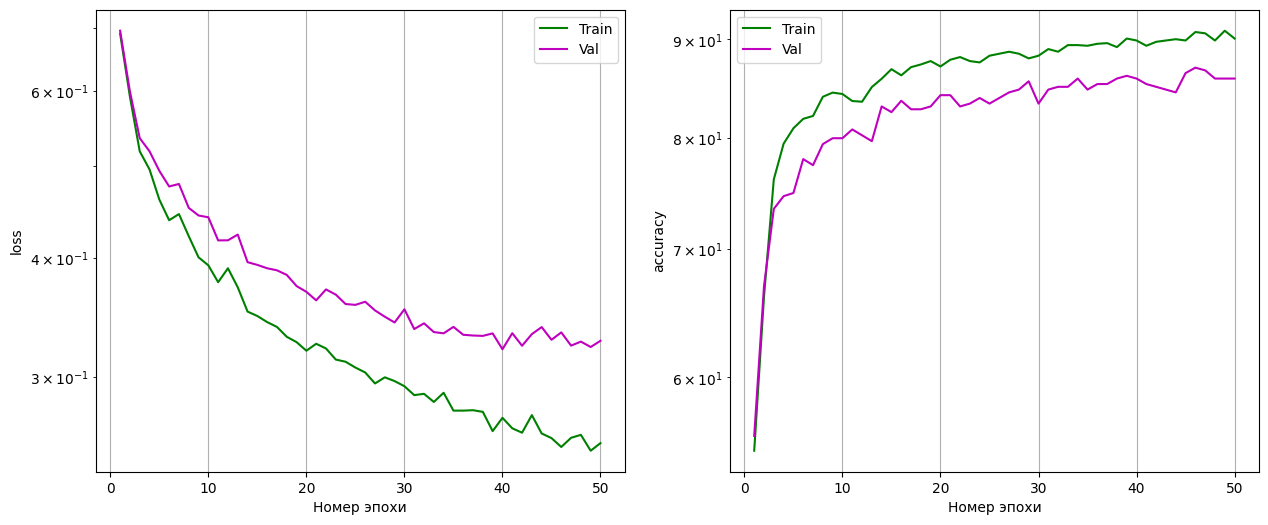

In [ ]:
dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset)
common_train(CONF1, model, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, model, train_dataset, test_dataset, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

Total:  0.9004524886877828


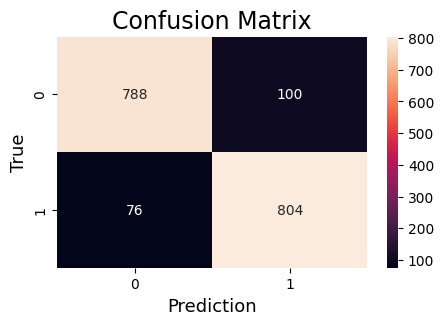

[[788 100]
 [ 76 804]]
Positive:  0.9136363636363637
Negative:  0.8873873873873874


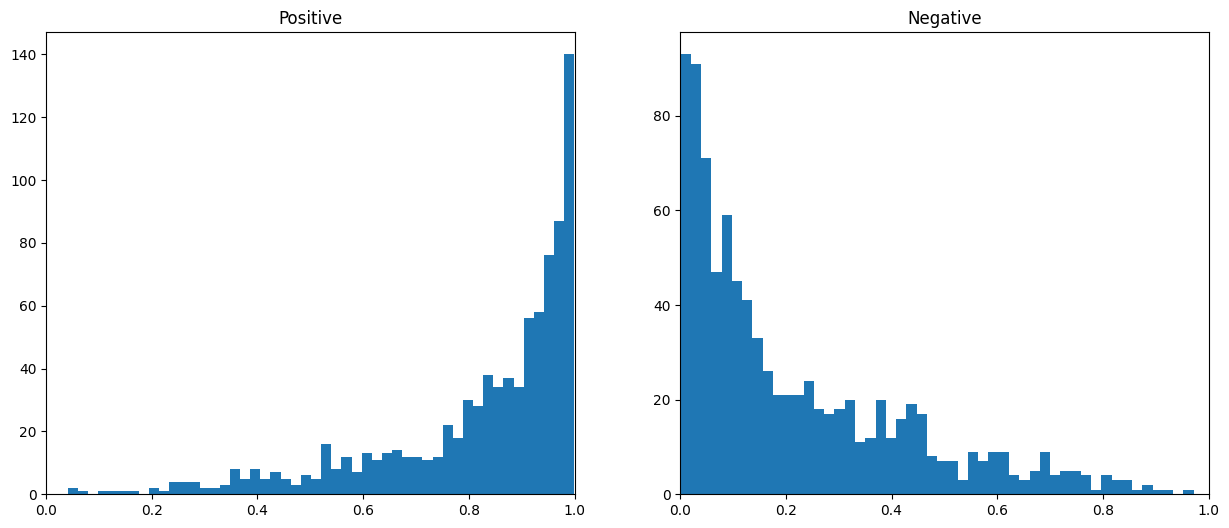

In [ ]:
X, y_true1, y_pred1, y_prob = get_predictions(model, dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Total: ", accuracy_score(y_pred1, y_true1))
print(confusion_matrix(y_true1, y_pred1))

X, y_true2, y_pred2, y_prob2 = get_predictions(model, pos_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Positive: ", accuracy_score(y_pred2, y_true2))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Positive")
distribution(y_prob2)

X, y_true3, y_pred3, y_prob3 = get_predictions(model, neg_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Negative: ", accuracy_score(y_pred3, y_true3))
plt.subplot(1, 2, 2)
plt.title("Negative")
distribution(y_prob3)
plt.show()

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.3,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 50,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.6,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.8,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.1,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 24,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

# Больше аугментации

In [ ]:
CONF1 = hydra_config("config (bin).yaml")
show_CONF(CONF1)

In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=40, neg_aug=4)

In [ ]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(CONF1.device)
num_classes = 2
num_non_freeze = 2050 # 2361346
seed_everything(CONF1.seed)
model = create_model(model, num_non_freeze, num_classes, verbose=False).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(model)}")

11168130
11168066
11168002
11131138
11131074
11131010
11094146
11094082
11094018
11057154
11057090
11057026
11020162
11020098
11020034
10946306
10946178
10946050
10798594
10798466
10798338
10790146
10790018
10789890
10642434
10642306
10642178
10494722
10494594
10494466
10199554
10199298
10199042
9609218
9608962
9608706
9575938
9575682
9575426
8985602
8985346
8985090
8395266
8395010
8394754
7215106
7214594
7214082
4854786
4854274
4853762
4722690
4722178
4721666
2362370
2361858
2361346
2050
num parameters ResNet = 2050


split_dataset: Train: 1414 Test: 354 Total: 1768
train: started, kind = 'cl'
# 2024-06-06 08:18:08 Epoch  1 train/val: loss 0.70834/0.71202, acc: 51.202%/ 50.847%
# 2024-06-06 08:18:13 Epoch  2 train/val: loss 0.63576/0.64843, acc: 62.023%/ 56.215%
# 2024-06-06 08:18:17 Epoch  3 train/val: loss 0.56742/0.58608, acc: 69.661%/ 67.514%
# 2024-06-06 08:18:22 Epoch  4 train/val: loss 0.54471/0.55828, acc: 73.479%/ 72.599%
# 2024-06-06 08:18:26 Epoch  5 train/val: loss 0.51333/0.53692, acc: 76.025%/ 76.836%
# 2024-06-06 08:18:31 Epoch  6 train/val: loss 0.50345/0.51996, acc: 77.440%/ 77.966%
# 2024-06-06 08:18:35 Epoch  7 train/val: loss 0.49304/0.51256, acc: 78.713%/ 76.271%
# 2024-06-06 08:18:39 Epoch  8 train/val: loss 0.47025/0.49384, acc: 80.198%/ 79.096%
# 2024-06-06 08:18:44 Epoch  9 train/val: loss 0.45538/0.48376, acc: 80.552%/ 78.531%
# 2024-06-06 08:18:49 Epoch 10 train/val: loss 0.44208/0.47930, acc: 80.127%/ 78.814%
# 2024-06-06 08:18:53 Epoch 11 train/val: loss 0.43165/0.46559,

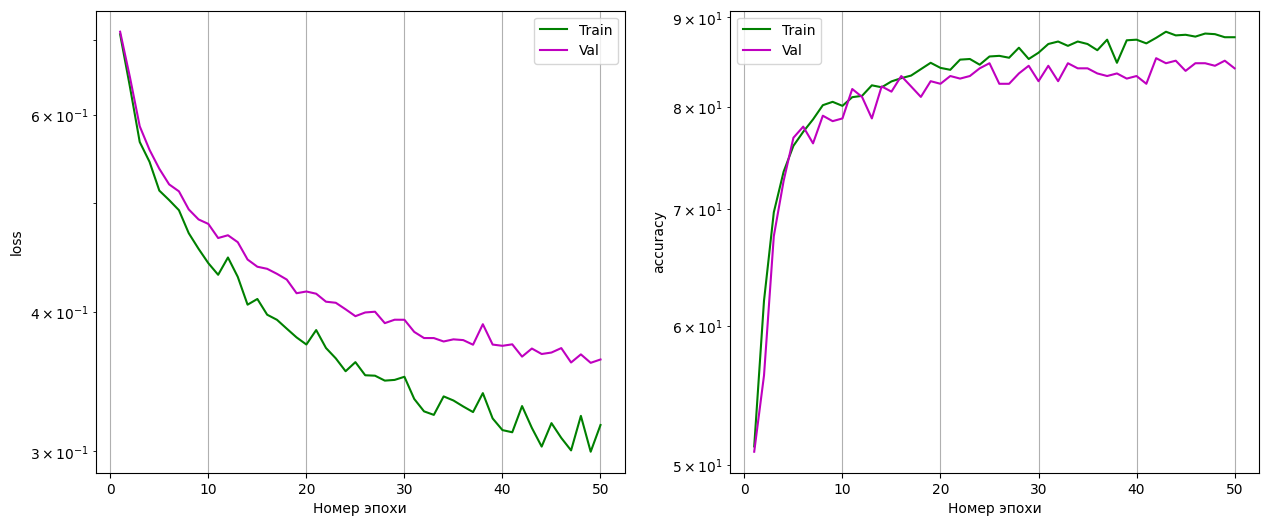

In [ ]:
dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset)
common_train(CONF1, model, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, model, train_dataset, test_dataset, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

Total:  0.871606334841629


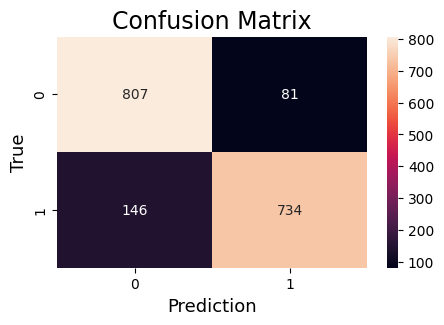

[[807  81]
 [146 734]]
Positive:  0.8340909090909091
Negative:  0.9087837837837838


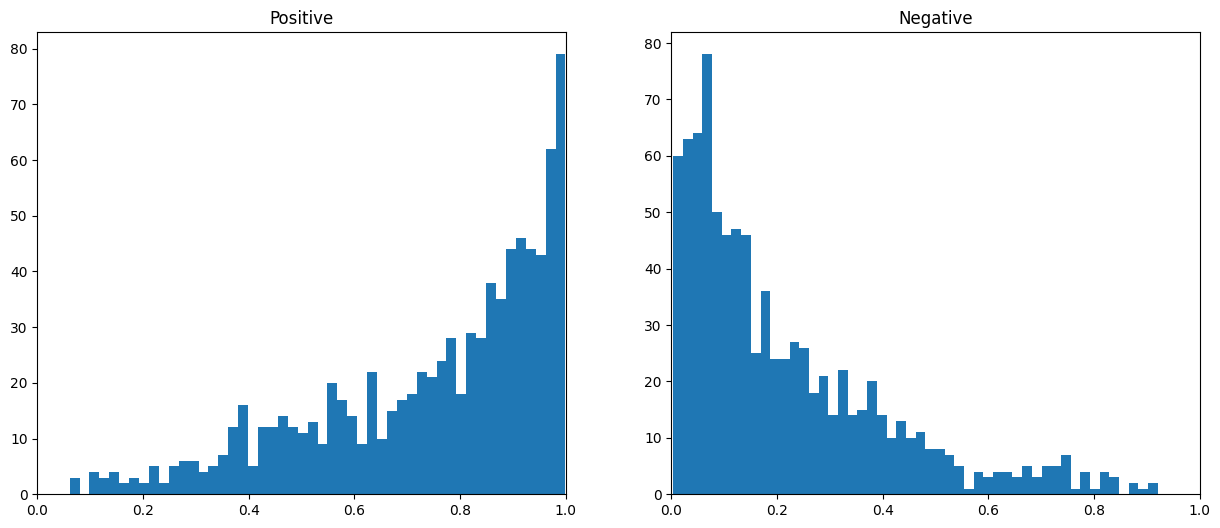

In [ ]:
X, y_true1, y_pred1, y_prob = get_predictions(model, dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Total: ", accuracy_score(y_pred1, y_true1))
print(confusion_matrix(y_true1, y_pred1))

X, y_true2, y_pred2, y_prob2 = get_predictions(model, pos_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Positive: ", accuracy_score(y_pred2, y_true2))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Positive")
distribution(y_prob2)

X, y_true3, y_pred3, y_prob3 = get_predictions(model, neg_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Negative: ", accuracy_score(y_pred3, y_true3))
plt.subplot(1, 2, 2)
plt.title("Negative")
distribution(y_prob3)
plt.show()

In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=3, neg_aug=1)

Positive dataset: 66    (22)
Negative dataset: 222    (222)


prob < 0.6
count : 12 out of 66
pic idx : [62, 4, 35, 18, 42, 2, 43, 33, 37, 59, 34, 13]


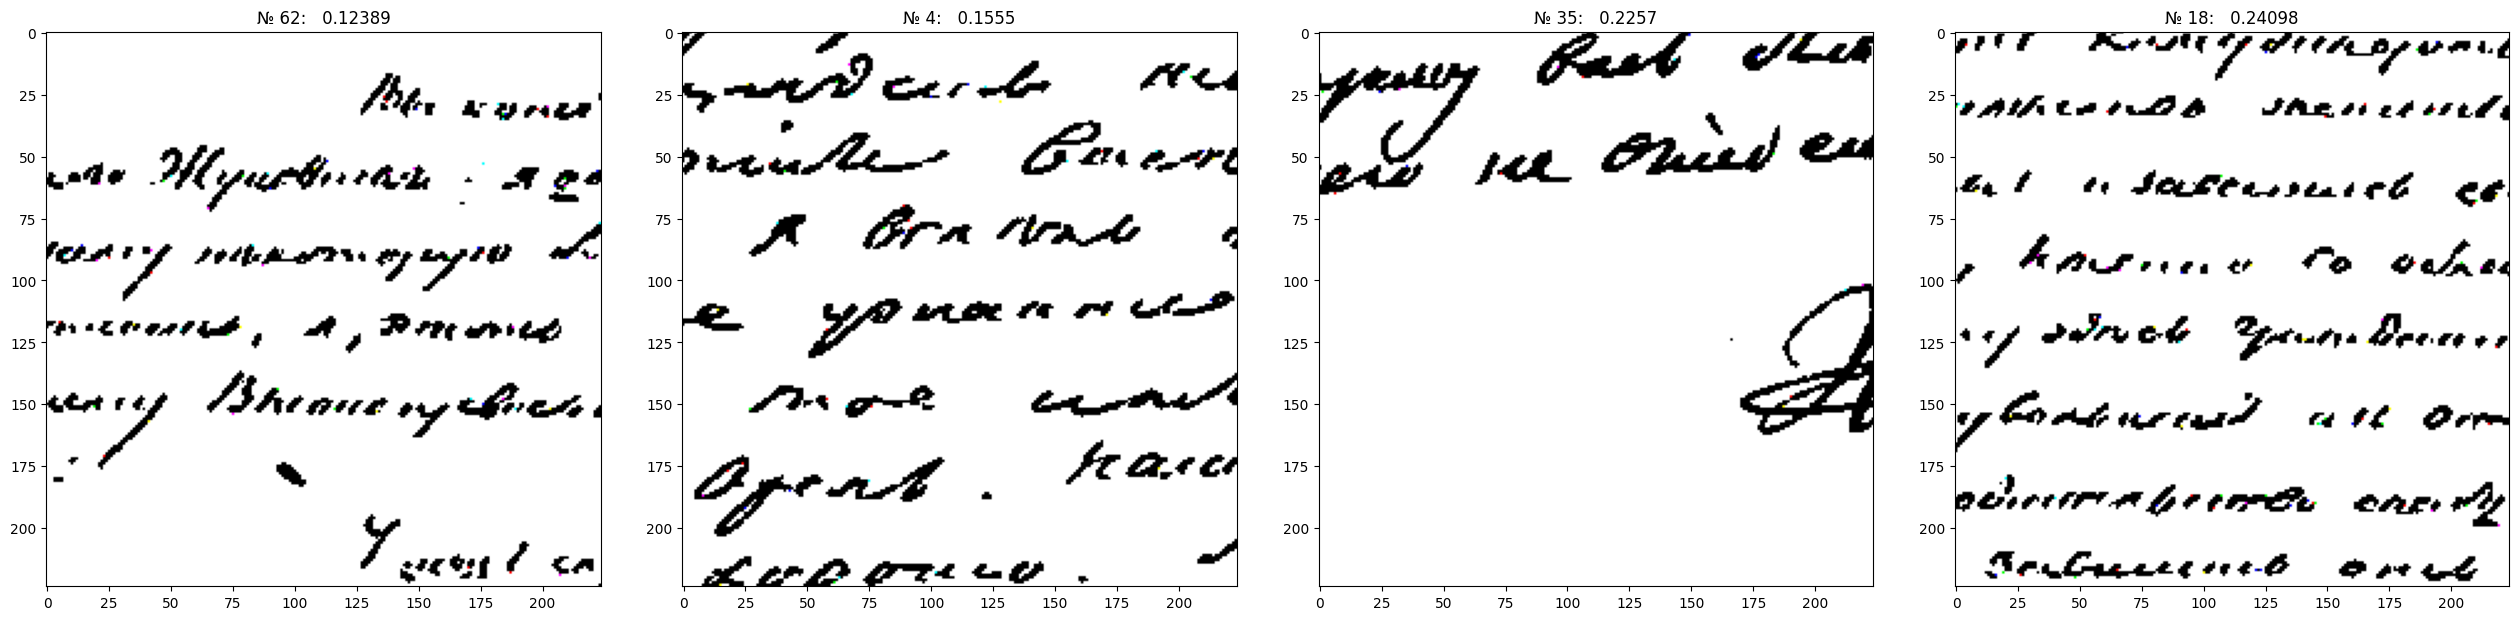

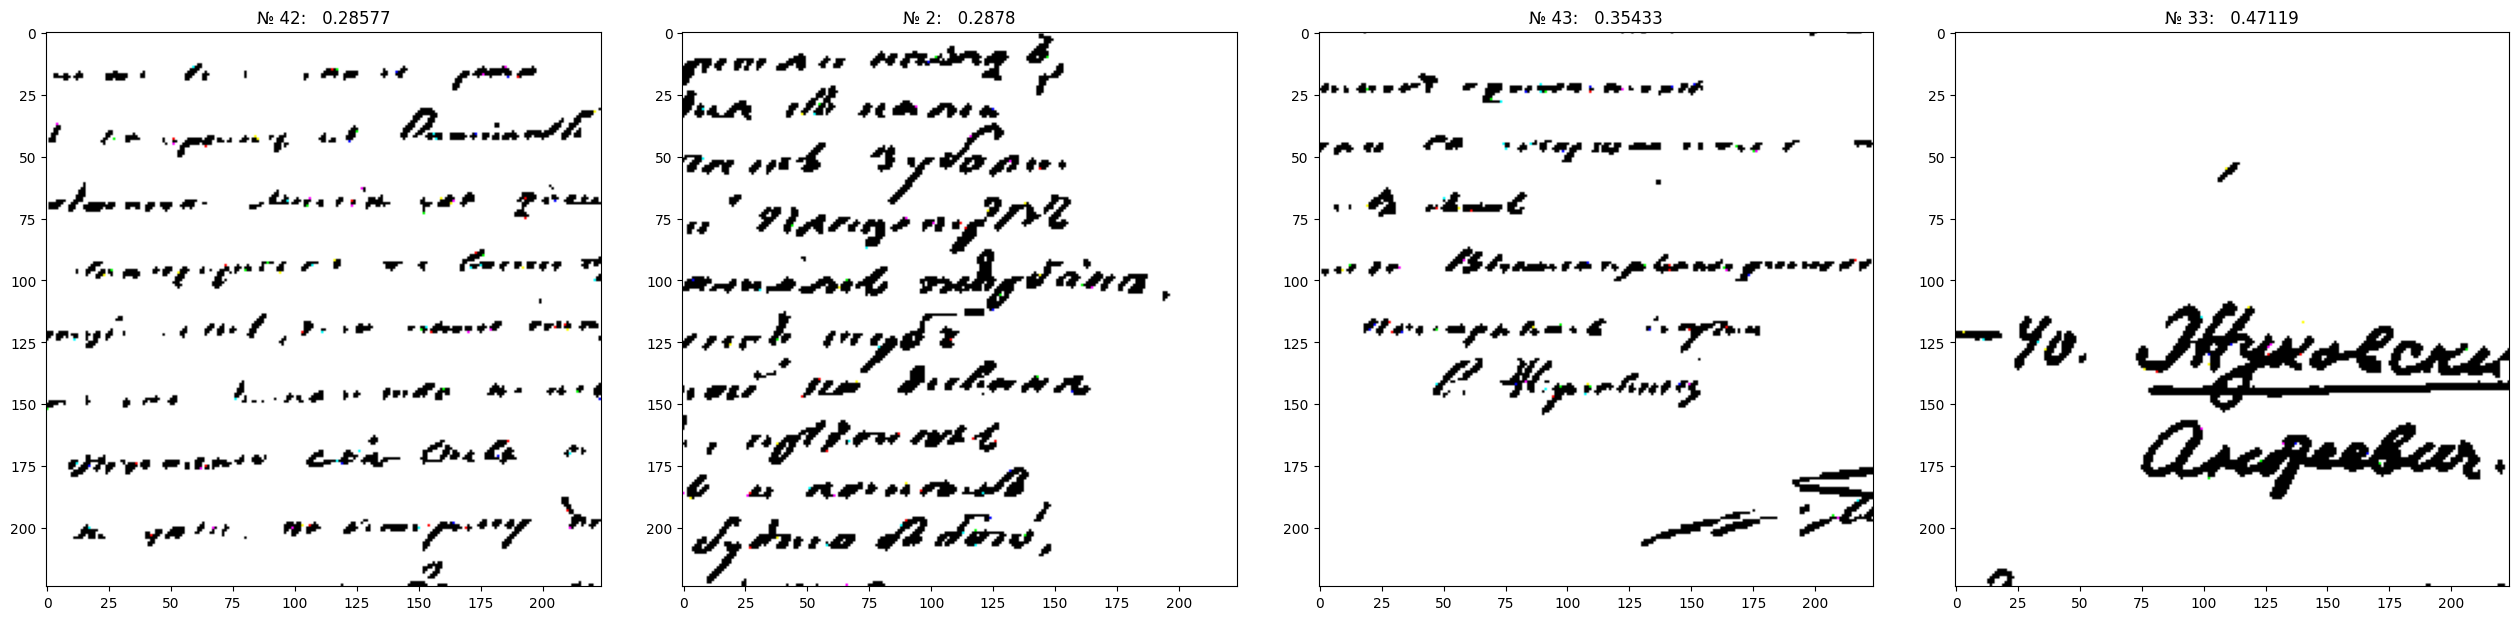

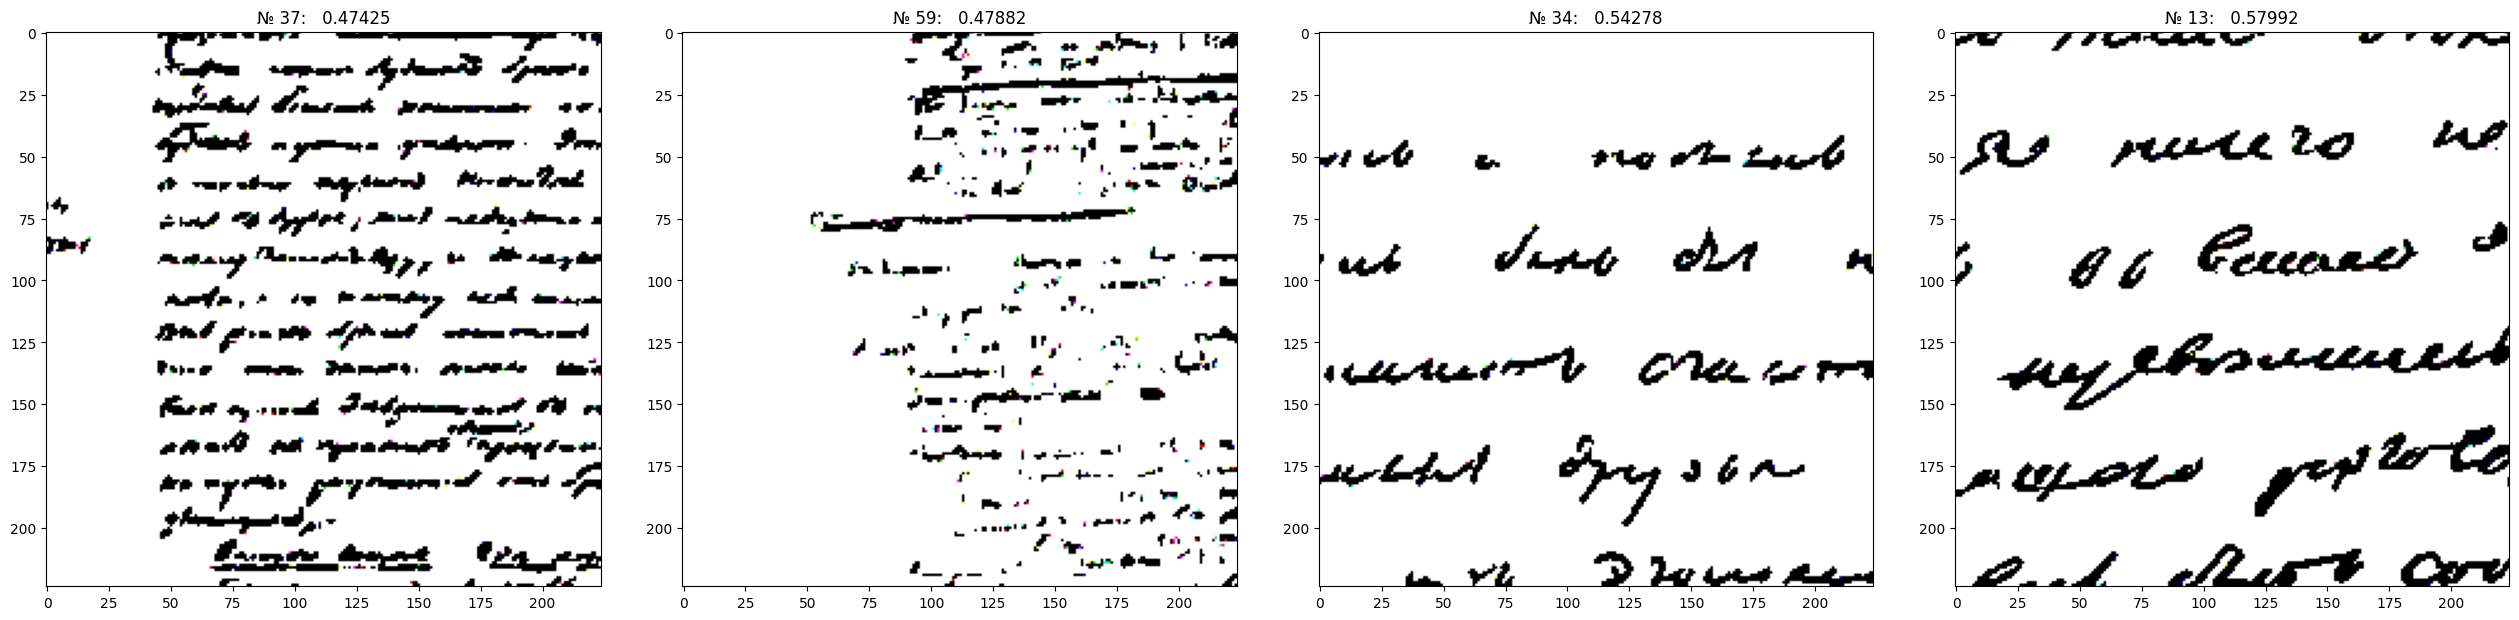

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.6,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 30,
                                   sort = True)

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.3,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 50,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

# siamese (1000 emb)

In [ ]:
CONF1 = hydra_config("config (siam).yaml")
show_CONF(CONF1)

{
        "seed": 42,
        "device": "cpu",
        "save_path": "checkpoints",
        "dataset": {
                "data_pos": "bin/1",
                "data_neg": "bin/0",
                "threshold": 0.95
        },
        "loader": {
                "batch_size": 64
        },
        "siamese": {
                "n_epochs": 50,
                "learning_rate": 0.0003,
                "margin": 9,
                "path_model": "checkpoints/siamese",
                "path_log": "checkpoints/siamese/siamese.pickle"
        },
        "classifier": {
                "n_epochs": 30,
                "learning_rate": 0.0003,
                "path_model": "checkpoints/classifier",
                "path_log": "checkpoints/classifier/classifier.pickle"
        }
}


In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=40, neg_aug=4)

Positive dataset: 880    (22)
Negative dataset: 888    (222)


In [ ]:
siam = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(CONF1.device)
num_classes = 128 # 1000
num_non_freeze = 513000 #
seed_everything(CONF1.seed)
siam = create_model(siam, num_non_freeze, num_classes, verbose=False).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(siam)}")

num parameters ResNet = 66688


load_best_model:
LOGS:
# 2024-06-07 10:10:04 Epoch 50 train/val: loss 0.20659/0.60811, acc: 99.887%/ 99.150%


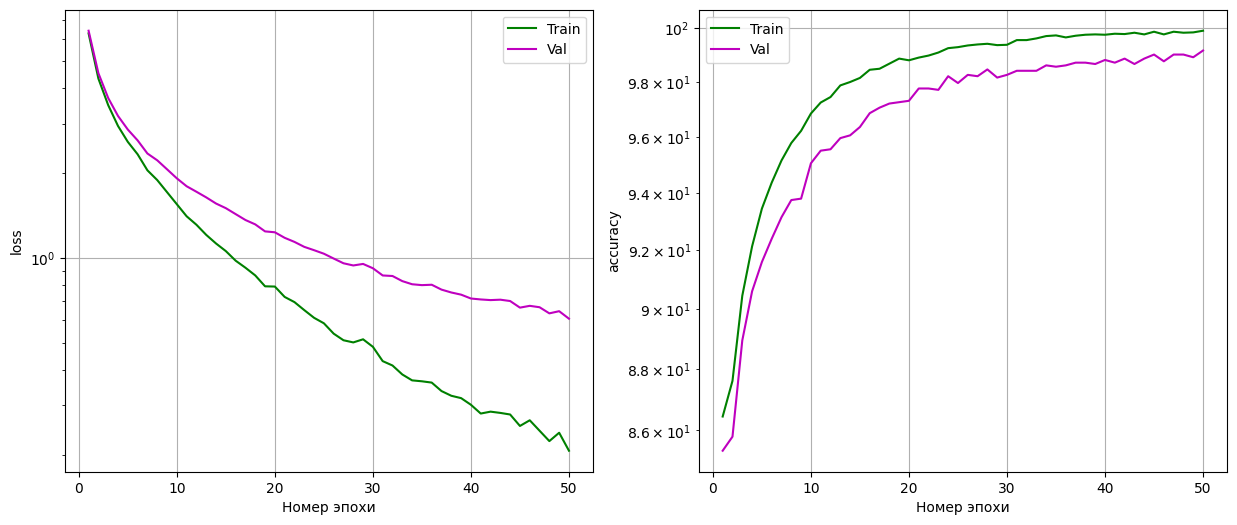

In [ ]:
# dataset_tri = TripletDataset(
#         pos_dataset, neg_dataset, required_len=10_000, deterministic=True, seed=CONF1.seed
#     )
# seed_everything(CONF1.seed)
# train_dataset, test_dataset = split_dataset(dataset_tri)
# common_train(CONF1, siam, train_dataset, test_dataset, kind="siam")
load_best_model(CONF1, siam, None, None, kind="siam")
logs = load_logs(CONF1.siamese.path_log)
graph_logs(logs, num=0)

split_dataset: Train: 8000 Test: 2000 Total: 10000
train: started, kind = 'siam'
# 2024-06-06 19:56:32 Epoch  1 train/val: loss 3.66539/3.91629, acc: 90.800%/ 89.650%
# 2024-06-06 19:57:38 Epoch  2 train/val: loss 2.34194/2.65795, acc: 94.575%/ 92.600%
# 2024-06-06 19:58:44 Epoch  3 train/val: loss 1.70791/2.07580, acc: 96.838%/ 95.150%
# 2024-06-06 19:59:50 Epoch  4 train/val: loss 1.31611/1.73559, acc: 97.950%/ 96.300%
# 2024-06-06 20:00:56 Epoch  5 train/val: loss 1.07248/1.50605, acc: 98.525%/ 96.750%
# 2024-06-06 20:02:02 Epoch  6 train/val: loss 0.90001/1.35972, acc: 98.862%/ 97.850%
# 2024-06-06 20:03:08 Epoch  7 train/val: loss 0.74951/1.19713, acc: 99.075%/ 97.750%
# 2024-06-06 20:04:17 Epoch  8 train/val: loss 0.66535/1.11242, acc: 99.325%/ 98.400%
# 2024-06-06 20:05:23 Epoch  9 train/val: loss 0.57657/1.01097, acc: 99.438%/ 98.600%
# 2024-06-06 20:06:29 Epoch 10 train/val: loss 0.50838/0.93942, acc: 99.612%/ 98.850%
# 2024-06-06 20:07:36 Epoch 11 train/val: loss 0.44161/0.88

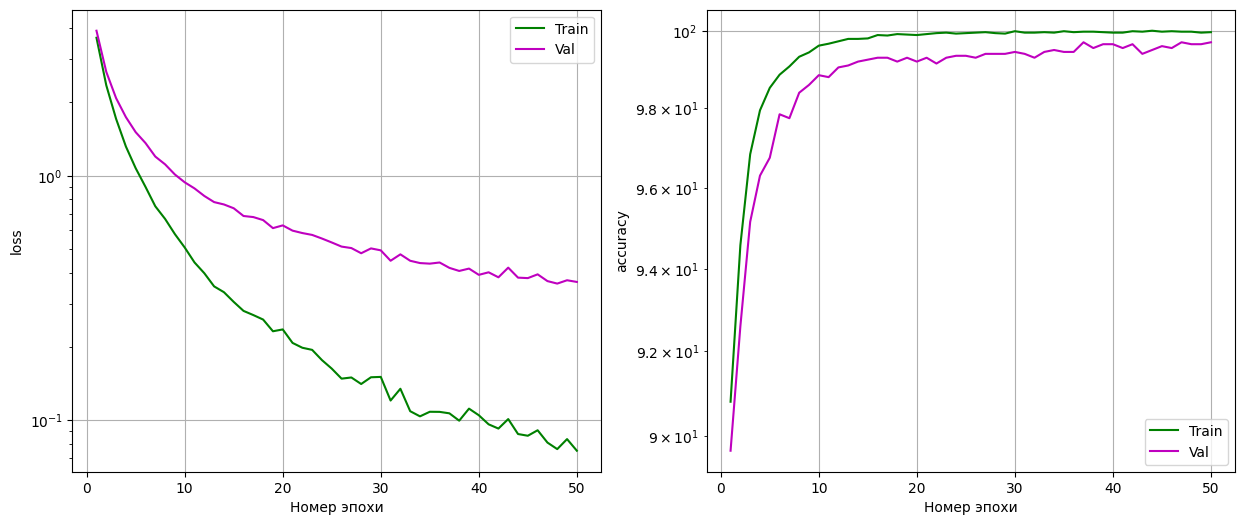

In [ ]:
dataset_tri = TripletDataset(
        pos_dataset, neg_dataset, required_len=10_000, deterministic=True, seed=CONF1.seed
    )
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset_tri)
common_train(CONF1, siam, train_dataset, test_dataset, kind="siam")
load_best_model(CONF1, siam, train_dataset, test_dataset, kind="siam")
logs = load_logs(CONF1.siamese.path_log)
graph_logs(logs, num=0)

num parameters = 67074
load_best_model:
LOGS:
# 2024-06-07 10:10:29 Epoch 24 train/val: loss 0.02966/0.13281, acc: 99.788%/ 96.328%


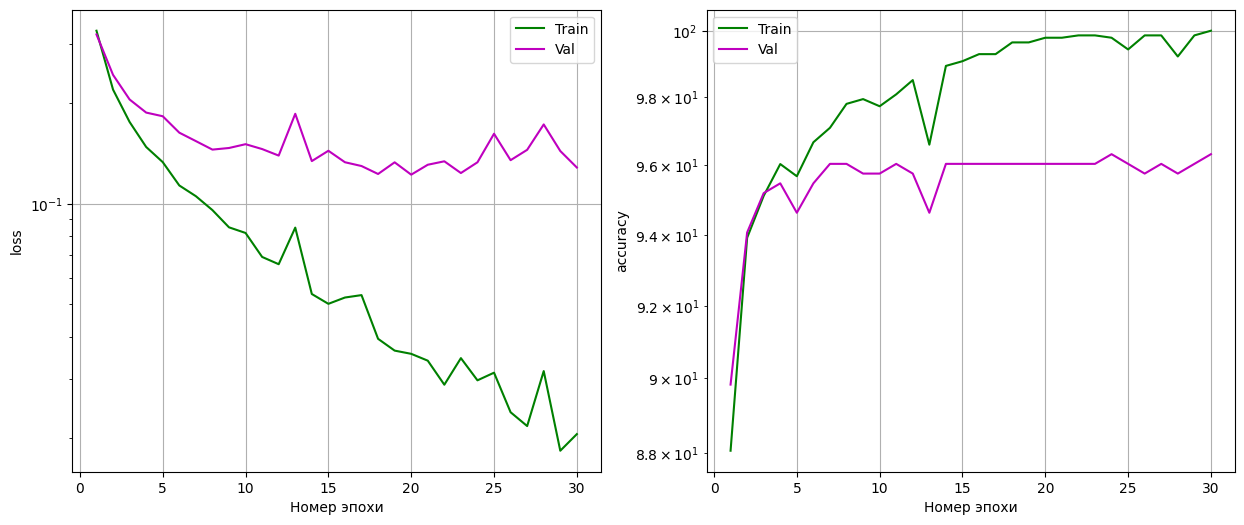

In [ ]:
cl = nn.Sequential(nn.Linear(num_classes, 512), nn.ReLU(), nn.Linear(512, 2)).to(
    CONF1.device
)
num_param = number_of_parameters(cl)
print(f"num parameters = {num_param}")

# dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
# dataset_emb = Emb_Dataset(siam, dataset, CONF1.device)
# seed_everything(CONF1.seed)
# train_dataset, test_dataset = split_dataset(dataset_emb)

# common_train(CONF1, cl, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, cl, None, None, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

model = Pipeline(siam, cl)

In [ ]:
cl = nn.Sequential(nn.Linear(num_classes, 512), nn.ReLU(), nn.Linear(512, 2)).to(
    CONF1.device
)
num_param = number_of_parameters(cl)
print(f"num parameters = {num_param}")

dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
dataset_emb = Emb_Dataset(siam, dataset, CONF1.device)
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset_emb)

common_train(CONF1, cl, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, cl, train_dataset, test_dataset, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

model = Pipeline(siam, cl)

num parameters = 513538
split_dataset: Train: 1414 Test: 354 Total: 1768
train: started, kind = 'cl'
# 2024-06-06 20:51:59 Epoch  1 train/val: loss 0.24225/0.26174, acc: 92.433%/ 92.090%
# 2024-06-06 20:52:11 Epoch  2 train/val: loss 0.16545/0.21416, acc: 94.554%/ 94.350%
# 2024-06-06 20:52:22 Epoch  3 train/val: loss 0.12594/0.18086, acc: 97.383%/ 95.198%
# 2024-06-06 20:52:33 Epoch  4 train/val: loss 0.09013/0.15646, acc: 98.515%/ 96.045%
# 2024-06-06 20:52:45 Epoch  5 train/val: loss 0.06750/0.14804, acc: 99.081%/ 96.610%
# 2024-06-06 20:52:56 Epoch  6 train/val: loss 0.05270/0.13752, acc: 99.576%/ 96.610%
# 2024-06-06 20:53:08 Epoch  7 train/val: loss 0.05601/0.12539, acc: 99.151%/ 96.328%
# 2024-06-06 20:53:19 Epoch  8 train/val: loss 0.03762/0.12788, acc: 99.859%/ 96.893%
# 2024-06-06 20:53:31 Epoch  9 train/val: loss 0.03068/0.17358, acc: 99.717%/ 95.480%
# 2024-06-06 20:53:42 Epoch 10 train/val: loss 0.02360/0.15624, acc: 99.859%/ 95.763%
# 2024-06-06 20:53:54 Epoch 11 train/va

Total:  0.994343891402715


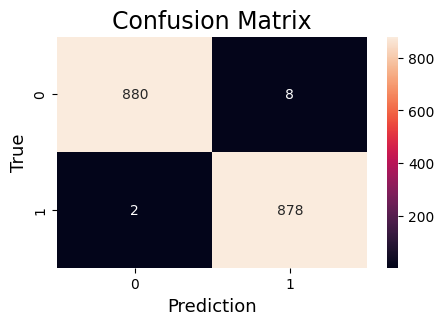

[[880   8]
 [  2 878]]
Positive:  0.9977272727272727
Negative:  0.990990990990991


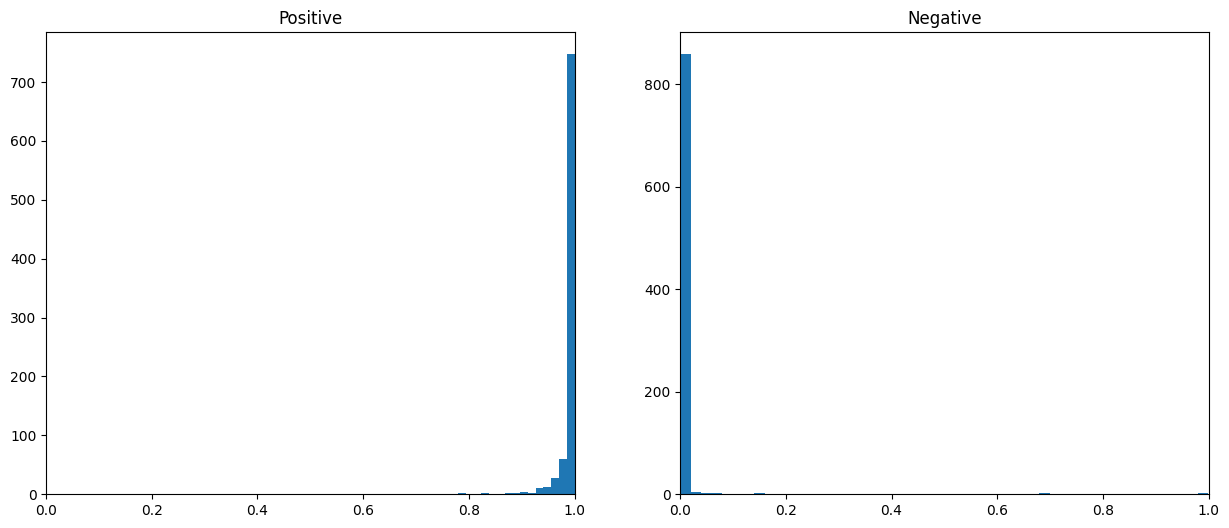

In [ ]:
X, y_true1, y_pred1, y_prob = get_predictions(model, dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Total: ", accuracy_score(y_pred1, y_true1))
print(confusion_matrix(y_true1, y_pred1))

X, y_true2, y_pred2, y_prob2 = get_predictions(model, pos_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Positive: ", accuracy_score(y_pred2, y_true2))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Positive")
distribution(y_prob2)

X, y_true3, y_pred3, y_prob3 = get_predictions(model, neg_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Negative: ", accuracy_score(y_pred3, y_true3))
plt.subplot(1, 2, 2)
plt.title("Negative")
distribution(y_prob3)
plt.show()

prob > 0.3
count : 10 out of 888
pic idx : [793, 612, 127, 639, 134, 117, 508, 415, 169, 672]


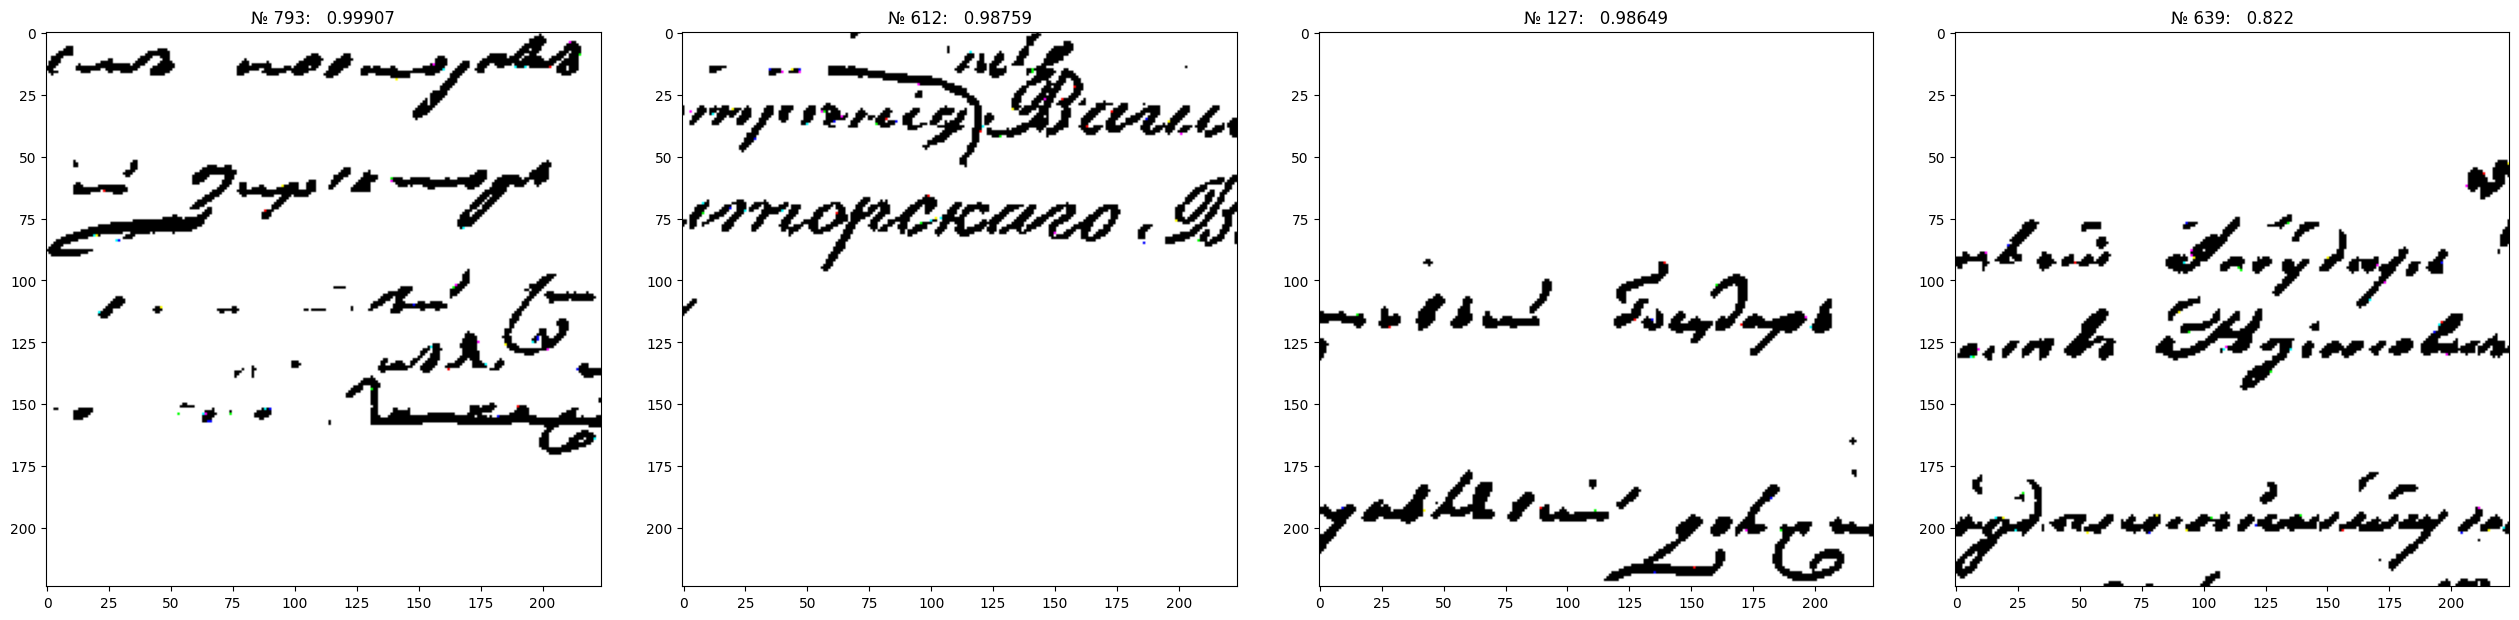

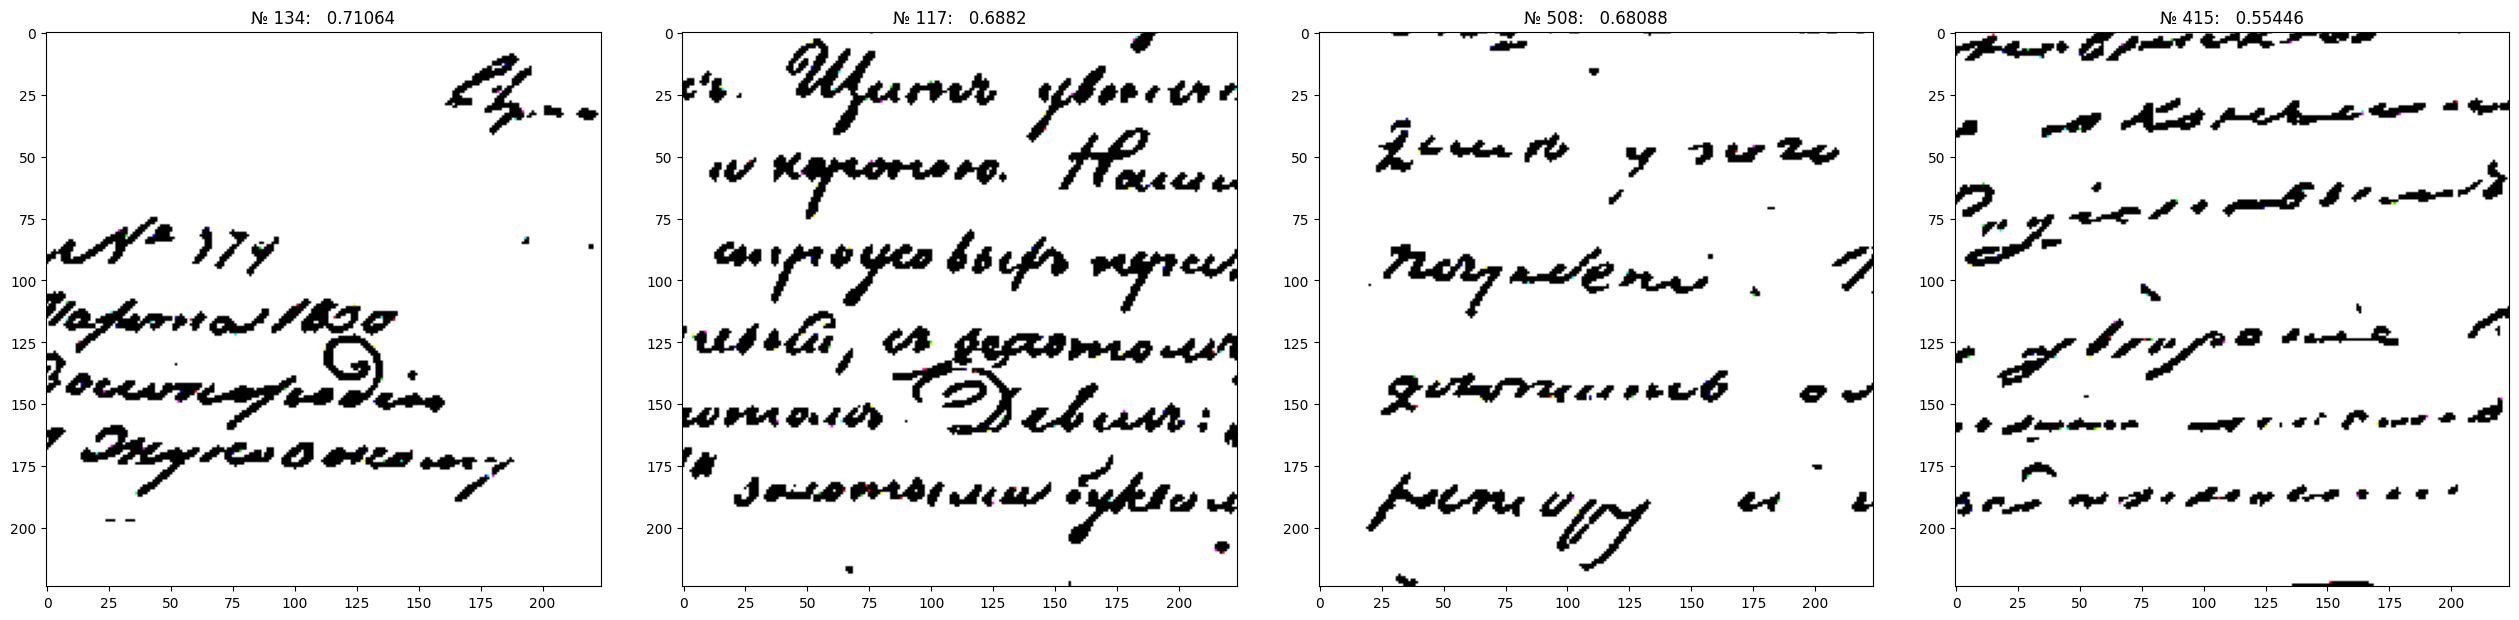

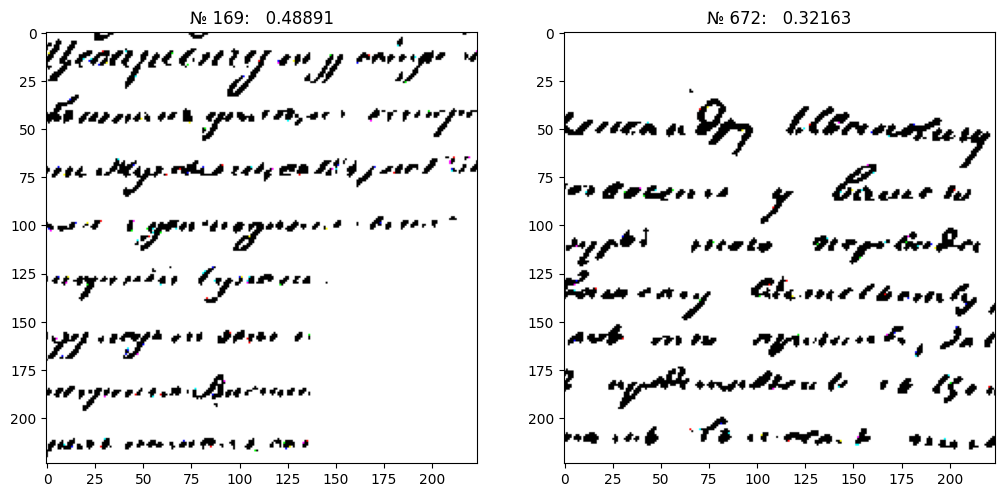

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.3,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 24,
                                   sort = True)

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.6,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 30,
                                   sort = True)

prob < 0.6
count : 3 out of 880
pic idx : [401, 4, 460]


In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.8,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.1,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 24,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

## Result

In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=3, neg_aug=5)

Positive dataset: 66    (22)
Negative dataset: 1110    (222)


In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 50,
                                   sort = True)

In [ ]:
show_voting(model, pos_dataset, 3, CONF1.loader.batch_size, CONF1.device)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def show_images(images, labels, n=4):
    num_pic = min(len(images), n)
    width, height = 4, num_pic // 4 + 1

    for i in range(num_pic):
        if i % width == 0:
            plt.figure(figsize=(6.4 * width, 10))

        plt.subplot(1, width, i % width + 1)

        img = images[i]
        img = np.transpose(img, (1, 2, 0))

        plt.imshow(img)
        # if torch.is_tensor(labels[i]):
        #     title = labels[i].numpy()
        # else:
        #     title = labels[i]
        # x, col = np.unique(img.max(dim=2)[0], return_counts=True)
        # ones = col[np.where(x == 1)[0]][0]
        # dol = ones / col.sum()

        number = labels[i]
        # number = "    ".join([str(_) for _ in labels[i]])
        title = (
            f"№ {int(number[0])} :   {round(number[1], 5)}"  # , доля белого - {dol:.4f}"
        )

        plt.title(title)

        if i % width == width - 1:
            plt.tight_layout()
            plt.show()

    plt.show()

In [ ]:
def show_best(images_dir, model,
    dataset,
    aug,
    batch_size,
    device):

    X, y_true, y_pred, y_prob = get_predictions(model, dataset, batch_size, device)

    y_prob = y_prob.reshape(-1, aug)
    print(y_prob.shape)
    y_prob = y_prob.max(dim=1).values
    _, indices = torch.sort(y_prob, descending=True)
    print(indices.shape)

    files_names = sorted(os.listdir(images_dir))
    image_paths = [os.path.join(images_dir, i) for i in files_names]

    X = []
    for name in image_paths:
        image = Image.open(name)
        transformed_image = transforms.ToTensor()(image)
        X.append(transformed_image)

    X_sort = []
    for i in indices:
        X_sort.append(X[i])

    labels = np.stack((indices, y_prob[indices]), axis=1)
    # labels = indices
    show_images(X_sort, labels, n = len(X))

In [ ]:
show_best(CONF1.dataset.data_neg, model, neg_dataset, 5, CONF1.loader.batch_size, CONF1.device)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
a = torch.tensor([1, 2, 3, 1, 3, 2, 9, 2]).reshape(-1, 2)
a.max(dim = 1).values

tensor([2, 3, 3, 9])

In [ ]:
a

tensor([[1, 2],
        [3, 1],
        [3, 2],
        [9, 2]])

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 50,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

# siamese (128 emb)

In [ ]:
CONF1 = hydra_config("config (siam).yaml")
show_CONF(CONF1)

{
        "seed": 42,
        "device": "cuda",
        "save_path": "checkpoints",
        "dataset": {
                "data_pos": "bin/1",
                "data_neg": "bin/0",
                "threshold": 0.95
        },
        "loader": {
                "batch_size": 64
        },
        "siamese": {
                "n_epochs": 50,
                "learning_rate": 0.0003,
                "margin": 9,
                "path_model": "checkpoints/siamese",
                "path_log": "checkpoints/siamese/siamese.pickle"
        },
        "classifier": {
                "n_epochs": 30,
                "learning_rate": 0.0003,
                "path_model": "checkpoints/classifier",
                "path_log": "checkpoints/classifier/classifier.pickle"
        }
}


In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=40, neg_aug=4)

Positive dataset: 880    (22)
Negative dataset: 888    (222)


In [ ]:
siam = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(CONF1.device)
num_classes = 128
num_non_freeze = 513000 #
seed_everything(CONF1.seed)
siam = create_model(siam, num_non_freeze, num_classes, verbose=False).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(siam)}")

num parameters ResNet = 66688


split_dataset: Train: 8000 Test: 2000 Total: 10000
train: started, kind = 'siam'
# 2024-06-07 07:47:29 Epoch  1 train/val: loss 6.26880/6.40687, acc: 86.450%/ 85.350%
# 2024-06-07 07:48:36 Epoch  2 train/val: loss 4.33202/4.52665, acc: 87.613%/ 85.800%
# 2024-06-07 07:49:41 Epoch  3 train/val: loss 3.48622/3.69519, acc: 90.450%/ 88.950%
# 2024-06-07 07:50:46 Epoch  4 train/val: loss 2.94084/3.19119, acc: 92.138%/ 90.600%
# 2024-06-07 07:51:52 Epoch  5 train/val: loss 2.58232/2.85590, acc: 93.450%/ 91.600%
# 2024-06-07 07:52:57 Epoch  6 train/val: loss 2.33304/2.61333, acc: 94.363%/ 92.400%
# 2024-06-07 07:54:02 Epoch  7 train/val: loss 2.04591/2.34769, acc: 95.150%/ 93.150%
# 2024-06-07 07:55:08 Epoch  8 train/val: loss 1.88953/2.22084, acc: 95.775%/ 93.750%
# 2024-06-07 07:56:13 Epoch  9 train/val: loss 1.71164/2.06341, acc: 96.213%/ 93.800%
# 2024-06-07 07:57:18 Epoch 10 train/val: loss 1.55081/1.91622, acc: 96.838%/ 95.050%
# 2024-06-07 07:58:23 Epoch 11 train/val: loss 1.40500/1.79

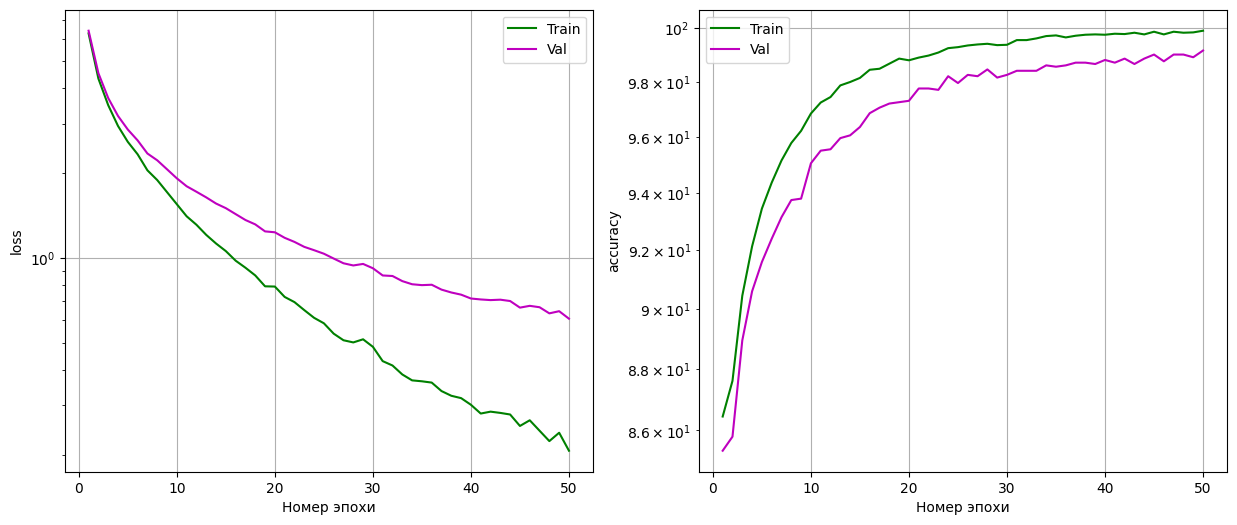

In [ ]:
dataset_tri = TripletDataset(
        pos_dataset, neg_dataset, required_len=10_000, deterministic=True, seed=CONF1.seed
    )
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset_tri)
common_train(CONF1, siam, train_dataset, test_dataset, kind="siam")
load_best_model(CONF1, siam, train_dataset, test_dataset, kind="siam")
logs = load_logs(CONF1.siamese.path_log)
graph_logs(logs, num=0)

num parameters = 67074
split_dataset: Train: 1414 Test: 354 Total: 1768
train: started, kind = 'cl'
# 2024-06-07 08:44:48 Epoch  1 train/val: loss 0.32815/0.31994, acc: 88.048%/ 89.831%
# 2024-06-07 08:44:58 Epoch  2 train/val: loss 0.21890/0.24223, acc: 93.918%/ 94.068%
# 2024-06-07 08:45:09 Epoch  3 train/val: loss 0.17522/0.20451, acc: 95.120%/ 95.198%
# 2024-06-07 08:45:21 Epoch  4 train/val: loss 0.14754/0.18691, acc: 96.040%/ 95.480%
# 2024-06-07 08:45:32 Epoch  5 train/val: loss 0.13296/0.18226, acc: 95.686%/ 94.633%
# 2024-06-07 08:45:44 Epoch  6 train/val: loss 0.11324/0.16280, acc: 96.676%/ 95.480%
# 2024-06-07 08:45:57 Epoch  7 train/val: loss 0.10520/0.15363, acc: 97.100%/ 96.045%
# 2024-06-07 08:46:09 Epoch  8 train/val: loss 0.09559/0.14491, acc: 97.808%/ 96.045%
# 2024-06-07 08:46:19 Epoch  9 train/val: loss 0.08492/0.14652, acc: 97.949%/ 95.763%
# 2024-06-07 08:46:30 Epoch 10 train/val: loss 0.08169/0.15040, acc: 97.737%/ 95.763%
# 2024-06-07 08:46:42 Epoch 11 train/val

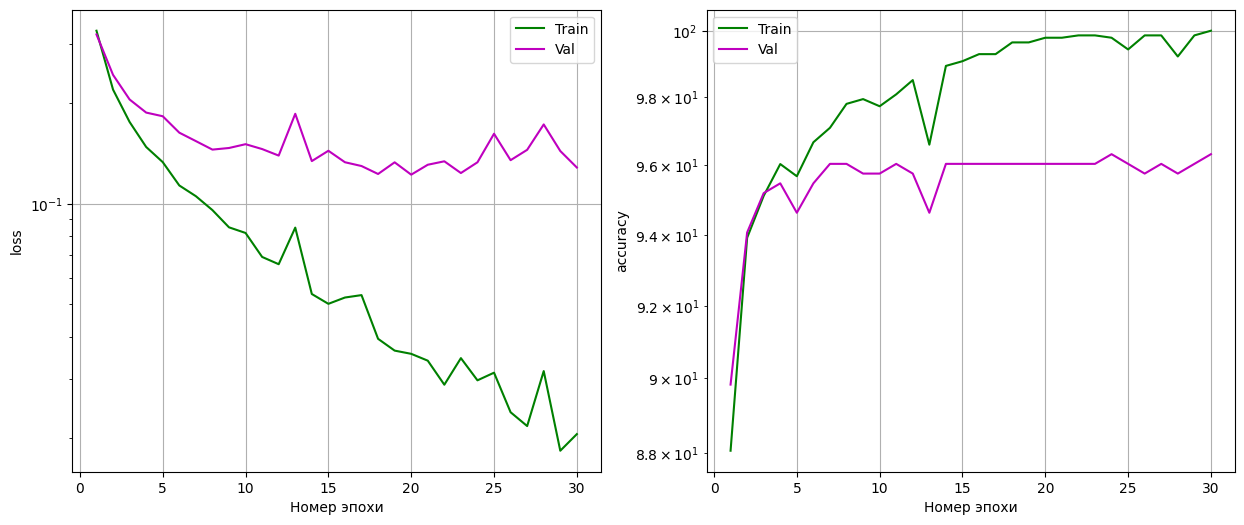

In [ ]:
cl = nn.Sequential(nn.Linear(num_classes, 512), nn.ReLU(), nn.Linear(512, 2)).to(
    CONF1.device
)
num_param = number_of_parameters(cl)
print(f"num parameters = {num_param}")

dataset = torch.utils.data.ConcatDataset([pos_dataset, neg_dataset])
dataset_emb = Emb_Dataset(siam, dataset, CONF1.device)
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(dataset_emb)

common_train(CONF1, cl, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, cl, train_dataset, test_dataset, kind="cl")
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0)

model = Pipeline(siam, cl)

Total:  0.9909502262443439


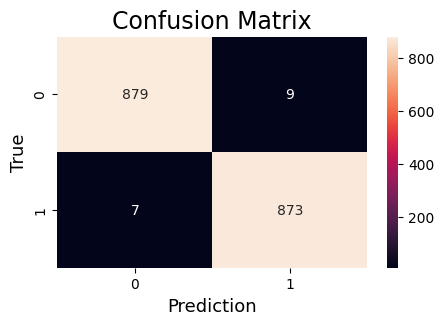

[[879   9]
 [  7 873]]
Positive:  0.9920454545454546
Negative:  0.9898648648648649


In [ ]:
X, y_true1, y_pred1, y_prob = get_predictions(model, dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Total: ", accuracy_score(y_pred1, y_true1))
print(confusion_matrix(y_true1, y_pred1))

X, y_true2, y_pred2, y_prob2 = get_predictions(model, pos_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Positive: ", accuracy_score(y_pred2, y_true2))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Positive")
distribution(y_prob2)

X, y_true3, y_pred3, y_prob3 = get_predictions(model, neg_dataset,
                                            CONF1.loader.batch_size, CONF1.device)
print("Negative: ", accuracy_score(y_pred3, y_true3))
plt.subplot(1, 2, 2)
plt.title("Negative")
distribution(y_prob3)
plt.show()

prob > 0.3
count : 14 out of 888
pic idx : [793, 627, 127, 672, 453, 612, 134, 639, 201, 513, 577, 458, 228, 868]


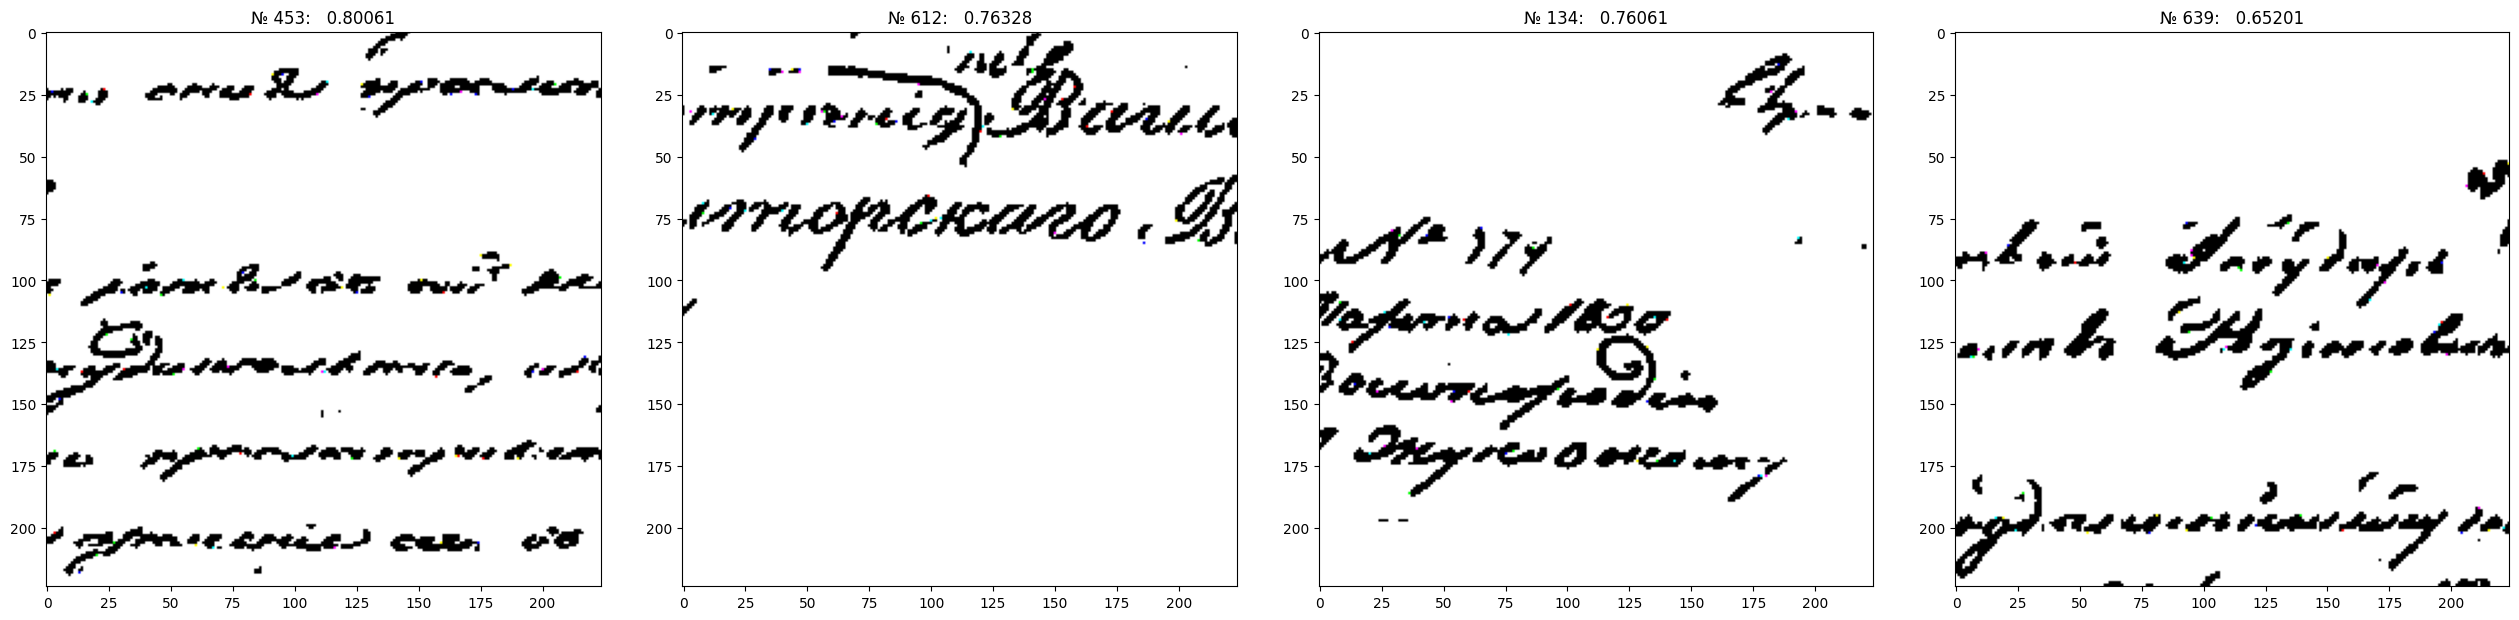

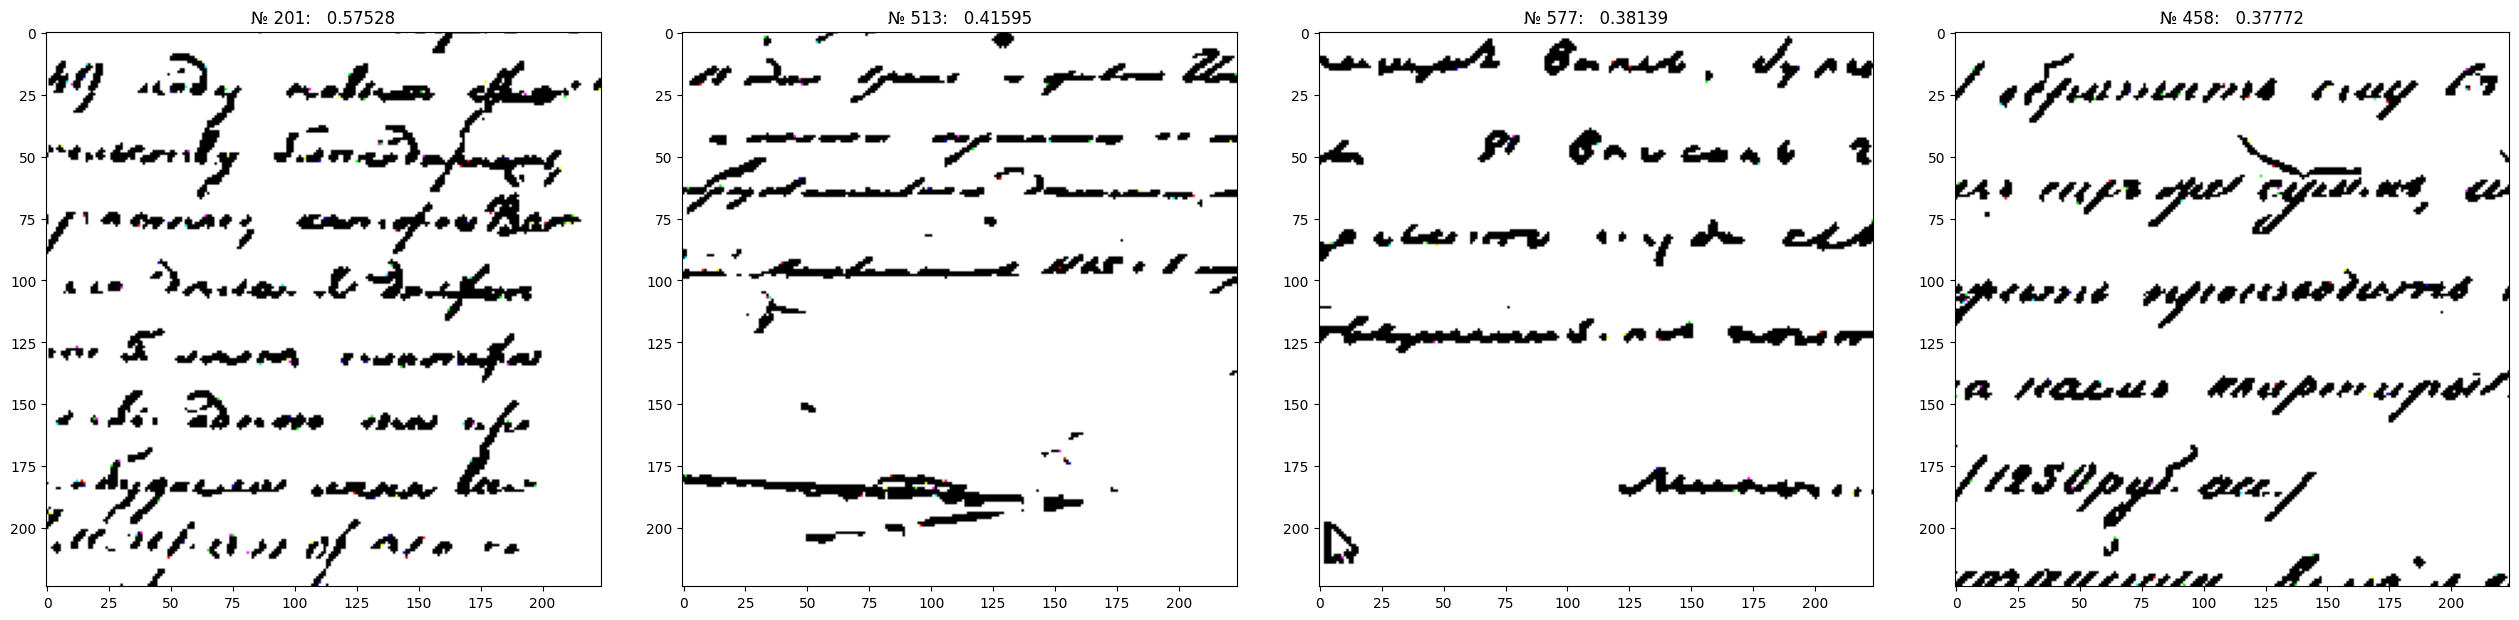

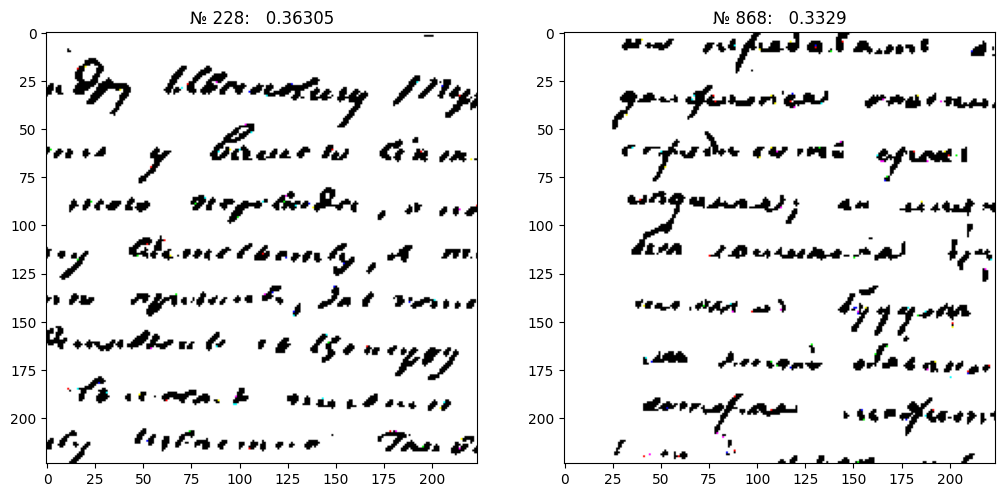

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.3,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 24,
                                   sort = True)

prob < 0.6
count : 10 out of 880
pic idx : [401, 460, 452, 4, 718, 290, 315, 105, 674, 13]


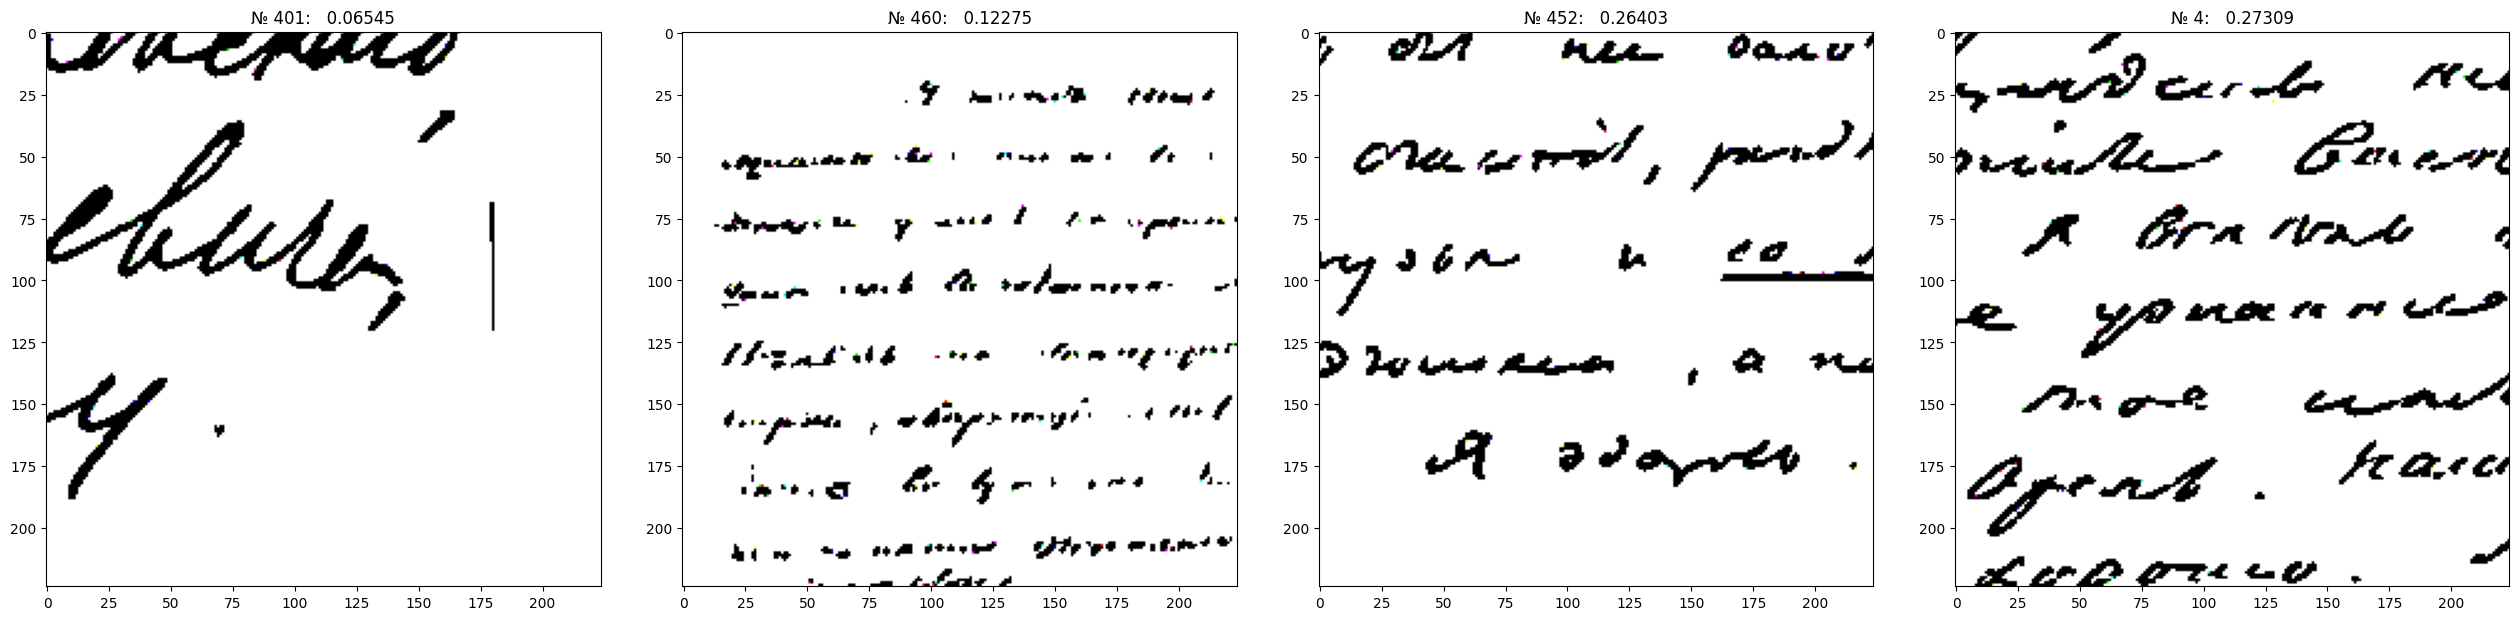

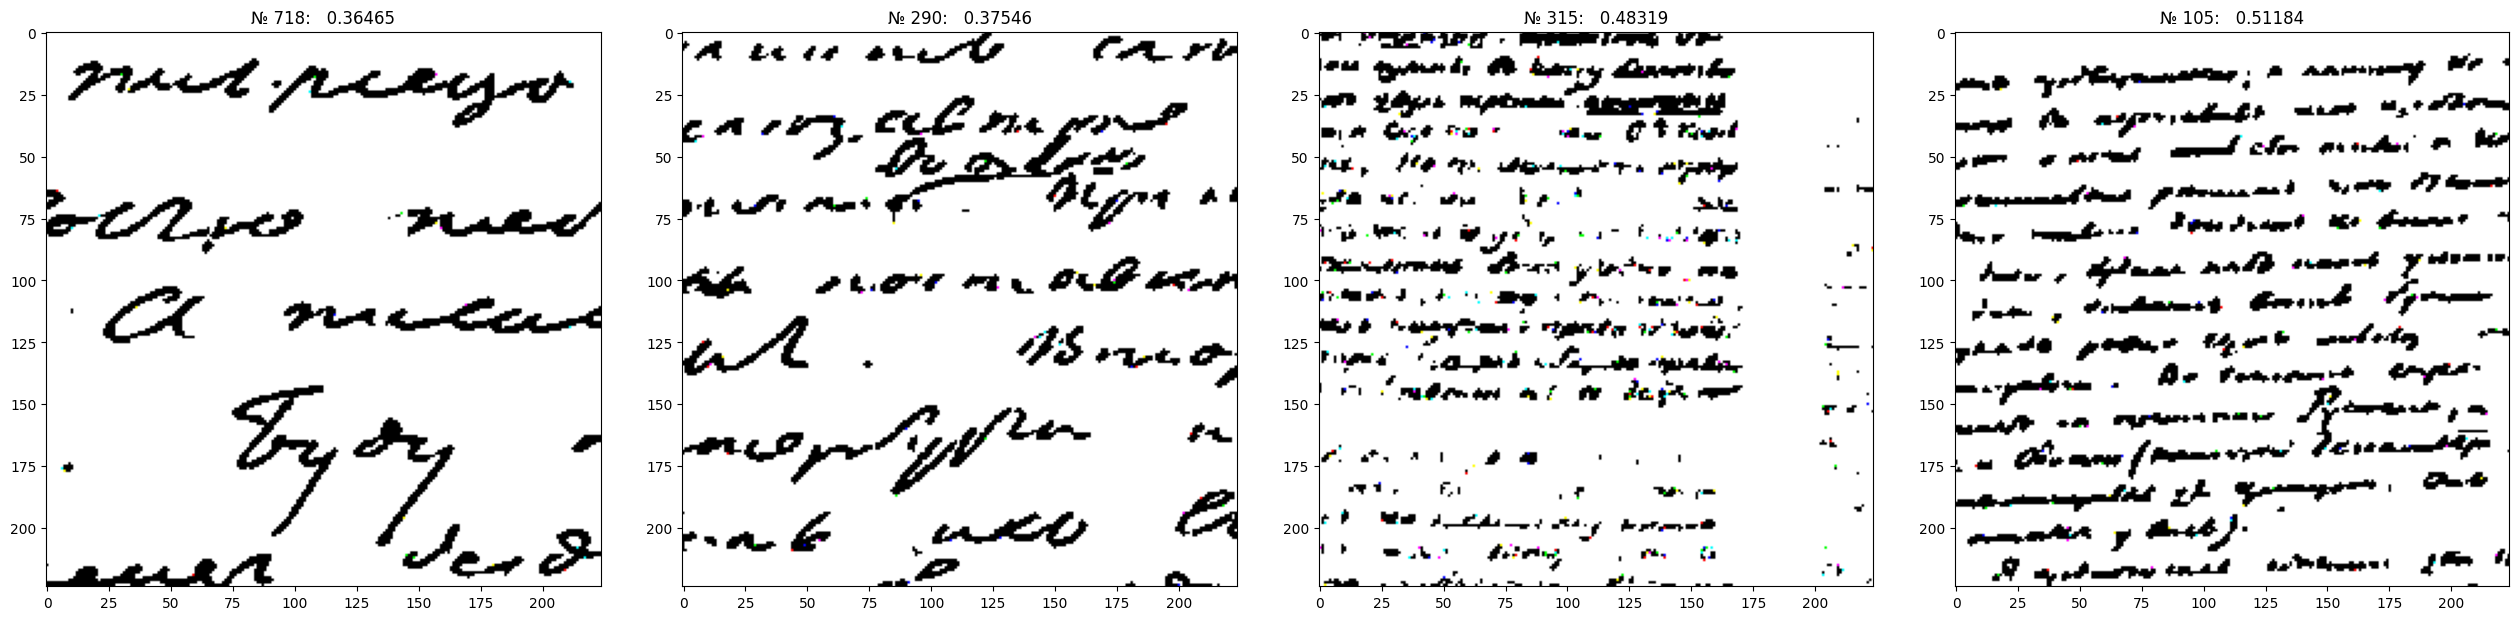

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.6,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 30,
                                   sort = True)

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, pos_dataset, 0.8,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 30,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0.1,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = False, col = 24,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

pos_dataset, neg_dataset = pos_neg_dataset(CONF1, transform, pos_aug=3, neg_aug=1)

Positive dataset: 66    (22)
Negative dataset: 222    (222)


In [ ]:
X, y_true, y_pred, y_prob, indices = show_result(model, neg_dataset, 0,
                                   CONF1.loader.batch_size, CONF1.device,
                                   greater = True, col = 50,
                                   sort = True)

Output hidden; open in https://colab.research.google.com to view.

# IAM

In [ ]:
CONF1 = hydra_config("config (AIM).yaml")
show_CONF(CONF1)

{
        "seed": 42,
        "device": "cpu",
        "save_path": "checkpoints",
        "loader": {
                "batch_size": 64
        },
        "siamese": {
                "n_epochs": 100,
                "learning_rate": 0.0003,
                "margin": 9,
                "path_model": "checkpoints/siam_aim",
                "path_log": "checkpoints/siam_aim/siam_aim.pickle"
        },
        "classifier": {
                "n_epochs": 50,
                "learning_rate": 0.0003,
                "path_model": "checkpoints/cl_aim",
                "path_log": "checkpoints/cl_aim/cl_aim.pickle"
        }
}


In [ ]:
# PATH = 'dataset'
# NEW_PATH = 'dataset_min'

# if not os.path.exists(NEW_PATH):
#     os.makedirs(NEW_PATH)

# for i in sorted(os.listdir(PATH)):
#     path = os.path.join(PATH, i)
#     list_pic = sorted(os.listdir(path))
#     if len(list_pic) > 5:
#         print(path, len(list_pic))

In [ ]:
# PATH = 'dataset'
# NEW_PATH = 'dataset_min'

# if not os.path.exists(NEW_PATH):
#     os.makedirs(NEW_PATH)

# for i in sorted(os.listdir(NEW_PATH)):
#     path = os.path.join(NEW_PATH, i)
#     list_pic = sorted(os.listdir(path))
#     if len(list_pic) > 5:
#         print(path, len(list_pic))

In [ ]:
from functools import partial

top = 610
bottom = 740
crop = partial(v2.functional.crop,
               top = top, left = 0, height = 3542 - top - bottom, width = 2479)

dataset = datasets.ImageFolder('dataset_min', transform=transforms.Compose(
        [   transforms.ToTensor(),
            v2.functional.grayscale_to_rgb,
            # crop,
            transforms.Resize(300),
            transforms.CenterCrop(224)
        ]))

torch.save(dataset, 'dataset_min.pt')

In [ ]:
dataset = torch.load('dataset_min.pt')
len(dataset)

397

In [ ]:
# for i, j in dataset:
#     print(i.shape, j)

In [ ]:
from collections import defaultdict

cls2idx = defaultdict(list)
for idx, (pic, cls) in tqdm(enumerate(dataset)):
    cls2idx[cls].append(idx)

397it [01:46,  3.73it/s]


In [ ]:
# save_logs(cls2idx, "cls2idx2.pickle")
cls2idx = load_logs("cls2idx2.pickle")
len(cls2idx)

39

In [ ]:
# save_logs(cls2idx, "cls2idx.pickle")
cls2idx = load_logs("cls2idx.pickle")
len(cls2idx)

657

In [ ]:
cls2idx

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [ ]:
from collections import defaultdict

class TripletMultiDataset(Dataset):
    def __init__(self, dataset, required_len, min_col=5, deterministic=True, seed=42,
                 cls2idx=cls2idx):
        self.dataset = dataset
        self.required_len = required_len
        self.deterministic = deterministic

        # self.cls2idx = defaultdict(list)

        # for idx, (pic, cls) in enumerate(dataset):
        #     self.cls2idx[cls].append(idx)
        #     print(self.cls2idx)

        self.cls2idx = cls2idx

        cls2idx_list = [[] for i in range(len(self.cls2idx))]
        for i, _ in enumerate(cls2idx_list):
            cls2idx_list[i] = self.cls2idx[i]

        self.cls2idx = cls2idx_list

        # self.transform = transforms.Compose(
        #     [   v2.functional.grayscale_to_rgb,
        #         transforms.Resize(500),
        #         transforms.RandomCrop(300),
        #         transforms.CenterCrop(224),
        #         transforms.ToTensor(),
        #         # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        #     ]
        # )

        if self.deterministic:
            seed_everything(seed)
            self.X = []

            for i in tqdm(range(self.required_len)):

                cls = random.randrange(len(self.cls2idx))
                idxs = self.cls2idx[cls]
                if len(idxs) > 1:
                    anchor, positive = random.sample(idxs, 2)
                else:
                    anchor, positive = idxs[0], idxs[0]
                anchor, positive = self.dataset[anchor][0], self.dataset[positive][0]

                clss = self.cls2idx[:cls] + self.cls2idx[cls+1:]
                idxs = random.choice(clss)
                negative = random.choice(idxs)
                negative = self.dataset[negative][0]

                l = [anchor, positive, negative]

                # print(l)
                # for i, path in enumerate(l):
                #     image = Image.open(path)
                #     l[i] = self.transform(image)

                self.X.append(l)


    def __len__(self):
        return self.required_len

    def __getitem__(self, idx):
        if idx < len(self):

            if self.deterministic:
                # anchor, positive, negative = self.X[idx]
                # return self.dataset[anchor][0], self.dataset[positive][0], self.dataset[negative][0]
                return self.X[idx]
            else:
                pass
        else:
            raise IndexError

In [ ]:
tripletdataset = TripletMultiDataset(dataset, required_len=1_000)

torch.save(tripletdataset, 'dataset.pt')

100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]


In [ ]:
siam = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
num_classes = 1000
num_non_freeze = 11689512
seed_everything(CONF1.seed)
siam = create_model(siam, num_non_freeze, num_classes).to(CONF1.device)
print(f"num parameters ResNet = {number_of_parameters(siam)}")

# tripletdataset = TripletMultiDataset("dataset", required_len=1000)
# torch.save(dataset, 'dataset.pt')
tripletdataset = torch.load('dataset.pt')
seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(tripletdataset)

common_train(CONF1, siam, train_dataset, test_dataset, kind="siam")
load_best_model(CONF1, siam, train_dataset, test_dataset, kind="siam")

num parameters ResNet = 11689512
split_dataset: Train: 800 Test: 200 Total: 1000
train: started, kind = 'siam'
# 2024-06-04 21:09:55 Epoch   1 train/val: loss 0.46281/0.52853, acc: 98.625%/ 99.500%
# 2024-06-04 21:10:05 Epoch   2 train/val: loss 0.05447/0.26644, acc:100.000%/ 98.000%
# 2024-06-04 21:10:15 Epoch   3 train/val: loss 0.05258/0.10298, acc: 99.875%/ 99.500%
# 2024-06-04 21:10:25 Epoch   4 train/val: loss 0.17551/0.21602, acc: 99.875%/ 99.000%
# 2024-06-04 21:10:35 Epoch   5 train/val: loss 0.00783/0.13085, acc:100.000%/100.000%
# 2024-06-04 21:10:44 Epoch   6 train/val: loss 0.03411/0.00379, acc: 99.875%/100.000%
# 2024-06-04 21:10:54 Epoch   7 train/val: loss 0.05342/0.10893, acc: 99.875%/100.000%
# 2024-06-04 21:11:04 Epoch   8 train/val: loss 0.02062/0.11172, acc:100.000%/ 99.500%
# 2024-06-04 21:11:14 Epoch   9 train/val: loss 0.00834/0.08236, acc:100.000%/ 99.500%
# 2024-06-04 21:11:24 Epoch  10 train/val: loss 0.02599/0.07881, acc: 99.875%/ 99.500%
# 2024-06-04 21:11:

In [ ]:
logs = load_logs(CONF1.siamese.path_log)
graph_logs(logs, num=0, ylog=False)

In [ ]:
dataloader = DataLoader(dataset, batch_size=CONF1.loader.batch_size, shuffle=False)
pred_items = []
true_items = []

with torch.no_grad():
    for batch in tqdm(dataloader):

        # получаем текущий батч
        X_batch, y_batch = batch

        true_items.append(y_batch)
        logits = siam(X_batch.to(CONF1.device))

        pred_items.append(logits)

pred_items = torch.cat(pred_items)
true_items = torch.cat(true_items)

torch.save(pred_items, 'pred_items.pt')
torch.save(true_items, 'true_items.pt')

100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


In [ ]:
class Emb_Dataset(Dataset):
    def __init__(self, prob_items, true_items):
        self.prob_items = prob_items
        self.true_items = true_items

    def __len__(self):
        return len(self.prob_items)

    def __getitem__(self, idx):
        if idx < len(self):
            return self.prob_items[idx], self.true_items[idx]
        else:
            raise IndexError

In [ ]:
cl = nn.Sequential(nn.Linear(1000, 512),
                   nn.ReLU(),
                   nn.Linear(512, 657),
                   ).to(
    CONF1.device
)
num_param = number_of_parameters(cl)
print(f"num parameters = {num_param}")

# dataset = datasets.ImageFolder('dataset')
emb_dataset = Emb_Dataset(pred_items, true_items)
# torch.save(emb_dataset, 'emb_dataset.pt')
# emb_dataset = torch.load('emb_dataset.pt')

seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(emb_dataset)

common_train(CONF1, cl, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, cl, train_dataset, test_dataset, kind="cl")

In [ ]:
# import gc

# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
cl = nn.Sequential(nn.Linear(1000, 512),
                   nn.ReLU(),
                   nn.Linear(512, 39), ######
                   ).to(
    CONF1.device
)
num_param = number_of_parameters(cl)
print(f"num parameters = {num_param}")

# dataset = datasets.ImageFolder('dataset')
emb_dataset = Emb_Dataset(pred_items, true_items)
# torch.save(emb_dataset, 'emb_dataset.pt')
# emb_dataset = torch.load('emb_dataset.pt')

seed_everything(CONF1.seed)
train_dataset, test_dataset = split_dataset(emb_dataset)

common_train(CONF1, cl, train_dataset, test_dataset, kind="cl")
load_best_model(CONF1, cl, train_dataset, test_dataset, kind="cl")

num parameters = 849553
split_dataset: Train: 317 Test: 80 Total: 397
train: started, kind = 'cl'
# 2024-06-04 21:32:21 Epoch  1 train/val: loss 4.63120/4.78137, acc: 38.801%/ 36.250%
# 2024-06-04 21:32:21 Epoch  2 train/val: loss 2.94010/3.02252, acc: 42.271%/ 42.500%
# 2024-06-04 21:32:22 Epoch  3 train/val: loss 1.72532/1.69419, acc: 55.836%/ 51.250%
# 2024-06-04 21:32:22 Epoch  4 train/val: loss 1.10031/1.00083, acc: 74.132%/ 73.750%
# 2024-06-04 21:32:22 Epoch  5 train/val: loss 0.78977/0.67274, acc: 90.536%/ 93.750%
# 2024-06-04 21:32:22 Epoch  6 train/val: loss 0.61511/0.51968, acc: 94.637%/ 97.500%
# 2024-06-04 21:32:22 Epoch  7 train/val: loss 0.49104/0.45043, acc: 93.060%/ 95.000%
# 2024-06-04 21:32:22 Epoch  8 train/val: loss 0.40702/0.38969, acc: 95.899%/ 93.750%
# 2024-06-04 21:32:22 Epoch  9 train/val: loss 0.34552/0.33691, acc: 97.476%/ 95.000%
# 2024-06-04 21:32:22 Epoch 10 train/val: loss 0.30049/0.29633, acc: 98.107%/ 96.250%
# 2024-06-04 21:32:22 Epoch 11 train/val: 

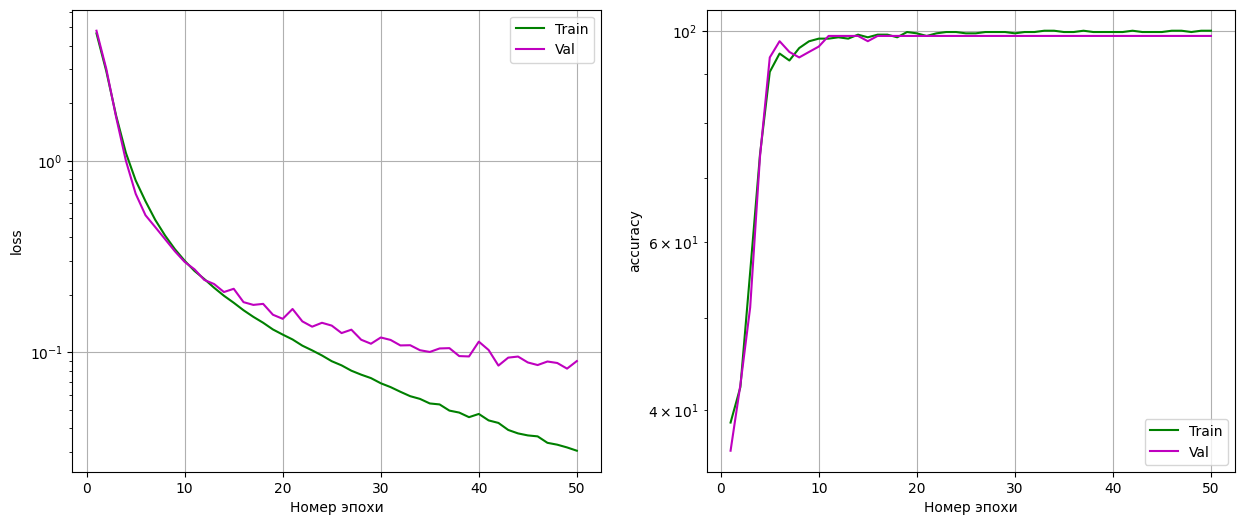

In [ ]:
logs = load_logs(CONF1.classifier.path_log)
graph_logs(logs, num=0, ylog=True)